In [264]:
import random
import os
import sys
import time
import numpy as np
import math
import zlib
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay

In [265]:
from CurveCGen import *
from CurveEA import *

In [266]:
import subprocess
BLENDER_PATH="C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe"

In [267]:
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations"

In [268]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [269]:
def golden_ratio(vertices, edges):
    def euclidean_distance(v1, v2):
        return ((v2[0] - v1[0])**2 + (v2[1] - v1[1])**2 + (v2[2] - v1[2])**2)**0.5
        
    golden_ratio = 1.61803398874989484820
    ratio_sum = 0
    ratio_count = 0
    
    for edge in edges:
        v1 = vertices[edge[0]]
        v2 = vertices[edge[1]]
        length = euclidean_distance(v1, v2)
        ratio = length / golden_ratio
        if ratio >= 1:
            ratio = 1 / ratio
        ratio_sum += ratio
        ratio_count += 1
    
    return ratio_sum / ratio_count


In [270]:
def perimeter(vertices, edges):
    perimeter = 0
    for edge in edges:
        vertex1, vertex2 = edge
        x1, y1, z1 = vertices[vertex1]
        x2, y2, z2 = vertices[vertex2]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
        perimeter += distance
    return perimeter

In [271]:
def volume(vertices):
    vertices=np.array(vertices)
    tri = Delaunay(vertices)
    print(tri.simplices)
    tetra = vertices[tri.simplices]
    volumes = np.zeros(len(tetra))

    for i, t in enumerate(tetra):
        a, b, c, d = t
        v = (1.0/6.0) * np.abs(np.dot(b - a, np.cross(c - a, d - a)))
        volumes[i] = v

    total_volume = np.sum(volumes)
    
    return total_volume

In [272]:
def compression_ratio(filepath):
    with open(filepath, mode="rb") as fin, open(filepath[:-6]+"_compressed", mode="wb") as fout:
            data = fin.read()
            compressed_data = zlib.compress(data, zlib.Z_BEST_COMPRESSION)
            orig=sys.getsizeof(data)
            comp=sys.getsizeof(compressed_data)
            ratio=comp/orig
    
            return ratio

In [273]:
def gen_blender(ARR,GEN_NUM):
    
    os.mkdir(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))
    
    for i,C in enumerate(ARR):
        
        #[r,g,b,a,bd,me,ro,ss,[VERTICES,EDGES],[new_L,new_B,new_H]]

        VERTS=C[8][0]
        EDGES=C[8][1]
        MATERIAL=str([C[0],C[1],C[2],C[3]])
        BD=str(C[4])
        ME=str(C[5])
        RO=str(C[6])
        SS=str(C[7])
        FILE_NUM=str(i)
        
        with open(f'{OUTPUT_PATH}\\GEN_{GEN_NUM}\\VERTS_G{GEN_NUM}_S{i}.txt', 'w') as f:
            f.writelines(str(VERTS))

        #subprocess.run(["blender", "--background", "--python","generate.py",FILE_NUM,f'VERTS_G{GEN_NUM}_S{i}.txt',MATERIAL,BD,ME,RO,SS,str(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))],capture_output=True,shell=True)
        #time.sleep(60)
        
        #print(f'Statue {i} Saved!')

## Basic Parameters for generation

In [274]:
L,B,H=10,12,17
POPULATION_SIZE=10

In [275]:
PARAMS=[]

## Initial Population

In [276]:
%%time

INITIAL_POPULATION=[]

for _ in range(POPULATION_SIZE):
    CH=generate_chromosome(L,B,H)
    INITIAL_POPULATION.append(CH)
    get_stats(CH)
    print('-'*125)

PARAMS.append(INITIAL_POPULATION)

(R, G, B, A) = (0.362537, 0.056445, 0.060798, 0.554162)
Number of vertices = 16
Number of edges = 15
Bevel Depth = 0.66
Metallic = 0.913738
Roughness = 0.347295
Subsurface Level = 0
New Bounding Box - (L,B,H) = (6.295578,8.183403,5.750434)
-----------------------------------------------------------------------------------------------------------------------------
(R, G, B, A) = (0.010779, 0.430818, 0.065326, 0.989272)
Number of vertices = 4
Number of edges = 3
Bevel Depth = 1.58
Metallic = 0.107412
Roughness = 0.034756
Subsurface Level = 3
New Bounding Box - (L,B,H) = (1.898909,11.088513,1.333656)
-----------------------------------------------------------------------------------------------------------------------------
(R, G, B, A) = (0.2086, 0.179358, 0.746439, 0.853829)
Number of vertices = 4
Number of edges = 3
Bevel Depth = 2.85
Metallic = 0.141262
Roughness = 0.273686
Subsurface Level = 6
New Bounding Box - (L,B,H) = (6.023471,1.195522,10.163603)
--------------------------------

In [277]:
%%time

os.mkdir(OUTPUT_PATH+"\\GEN_0")

for i,C in enumerate(PARAMS[0]):

    VERTS=C[8][0]
    EDGES=C[8][1]
    MATERIAL=str([C[0],C[1],C[2],C[3]])
    BD=str(C[4])
    ME=str(C[5])
    RO=str(C[6])
    SS=str(C[7])
    FILE_NUM=str(i)
    
    with open(f'{OUTPUT_PATH}\\GEN_0\\VERTS_G{0}_S{i}.txt', 'w') as f:
        f.writelines(str(VERTS))

    
    #subprocess.run(["blender", "--background", "--python","generate.py",FILE_NUM,f'VERTS_G0_S{i}.txt',MATERIAL,BD,ME,RO,SS,str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True)

    #time.sleep(60)
    
    print(f'Statue {i} Saved!')
    

Statue 0 Saved!
Statue 1 Saved!
Statue 2 Saved!
Statue 3 Saved!
Statue 4 Saved!
Statue 5 Saved!
Statue 6 Saved!
Statue 7 Saved!
Statue 8 Saved!
Statue 9 Saved!
Wall time: 31 ms


## Crossover and Mutation for more generations

In [278]:
GENERATIONS=300

In [279]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    for i in range(POPULATION_SIZE):
        
        VERTS=PARAMS[GEN_NUM-1][i][8][0]
        EDGES=PARAMS[GEN_NUM-1][i][8][1]
        
#         entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
#         entropy=entropy/8 
        
#         cr=compression_ratio(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
        
#         gr=golden_ratio(VERTS,EDGES)
        
        v=volume(VERTS)
        p=perimeter(VERTS,EDGES)
#         print(f"Volume: {v}")
#         print(f"Perimeter: {p}")
    
        #fitness=volume+perimeter
        fitness=p/v
        FITNESS.append(round(fitness,6))
    
    ALL_FITNESS.append(FITNESS)
    
    BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
    print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')
    
    MODELS=[]
    
    for _ in range(int(POPULATION_SIZE/2)):
    
        #selecting 2 random parents from previous generation
        idx1,idx2=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p1=idx1 if FITNESS[idx1]>FITNESS[idx2] else idx2
        
        idx3,idx4=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p2=idx3 if FITNESS[idx3]>FITNESS[idx4] else idx4
        
        crossover_prob=round(random.random(),6)
        mutation_prob=round(random.random(),6)
        
        if mutation_prob<0.8:
            #mutate the children after crossover
            m1=mutate(PARAMS[GEN_NUM-1][p1],L,B,H)
            m2=mutate(PARAMS[GEN_NUM-1][p2],L,B,H)
        else:
            m1,m2=PARAMS[GEN_NUM-1][p1],PARAMS[GEN_NUM-1][p2]
        
        if crossover_prob<0.2:
            #perform crossover for the selected parents
            c1,c2=crossover(m1,m2)
        else:
            c1,c2=m1,m2
        
        
        
        MODELS.append(c1)
        MODELS.append(c2)
        
    #print(len(MODELS))
    #appending the mutated childs to PARAMS array
    PARAMS.append(MODELS)
    
    #generate blender file
    gen_blender(MODELS,GEN_NUM)
    
    print(f"Generation {GEN_NUM} generated successfully!")
    print("-"*120)
    
    GEN_NUM+=1

[[ 4  8 12 11]
 [ 0  4 12  2]
 [ 0  4 12 10]
 [ 0 15 12  2]
 [ 0 15 12 10]
 [ 6  4 10 11]
 [ 6 15 12 10]
 [ 6  4 12 10]
 [14  8 11  9]
 [ 5  4 12 11]
 [ 5  6  4 11]
 [ 5  6  4 12]
 [ 5  6 11  9]
 [ 5  8 11  9]
 [ 5  8 12 11]
 [ 5  6 15 12]
 [ 3  4  8 11]
 [ 3 14  8 11]
 [ 3 14  8  2]
 [ 3  0  4  2]
 [ 3  0  4 11]
 [ 3  8 12  2]
 [ 3  4 12  2]
 [ 3  4  8 12]
 [ 7 14  8  9]
 [ 7 14 11  9]
 [ 1  5  8  9]
 [ 1  7  8  9]
 [ 1  5  6  9]
 [ 1  5  6 15]
 [13  7 14  8]
 [13  1  7  8]
 [13 14  8  2]
 [13  8 12  2]
 [13 15 12  2]
 [13  5  8 12]
 [13  1  5  8]
 [13  5 15 12]
 [13  1  5 15]]
[[3 1 2 0]]
[[2 0 1 3]]
[[ 3  8  2  1]
 [ 3  7  2  1]
 [ 3  7  0  2]
 [11  7 10  1]
 [ 6  7  0  2]
 [ 9  3  7  1]
 [ 9  3  7  0]
 [ 9 11  0  1]
 [ 9 11  7  1]
 [ 9 11  7  0]
 [ 5  4 10  2]
 [ 5  6 10  2]
 [ 5  6  7  2]
 [ 5  6  7 10]
 [ 5  7  2  1]
 [ 5  7 10  1]
 [ 5  4 10  1]
 [ 5  8  2  1]
 [ 5  4  8  1]
 [ 5  4  8  2]]
[[2 4 3 0]
 [2 1 4 3]]
[[ 3 15 21 18]
 [ 2 16  5 19]
 [ 2 15 16  5]
 [ 7  0 16  5]
 [ 7 1

[[3 0 2 1]]
[[ 2  0  9  7]
 [ 2  8  1  9]
 [ 2  8  1  3]
 [ 4  5  1  7]
 [ 4  5 10  7]
 [ 4  5  1  3]
 [ 4  5 10  3]
 [ 6  2  0  7]
 [ 6  4  1  7]
 [ 6  2  0  3]
 [ 6  4 10  3]
 [ 6  4 10  7]
 [ 6  1  9  7]
 [ 6  2  9  7]
 [ 6  2  1  9]
 [ 6  2  1  3]
 [ 6  4  1  3]]
Statue-8 has the best fitness value in 1 generation.
Generation 2 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 7 15  3 11]
 [19 14  0 10]
 [19 14  8 10]
 [21 14  8 10]
 [21 18 14  8]
 [21  1  8 10]
 [21 18 14  5]
 [21 18  1  5]
 [12 18  1  5]
 [12 18  9  1]
 [12 24  1  5]
 [12 24  9  1]
 [12 24  9 11]
 [12  9 11 22]
 [12 18 15  5]
 [12 24  3 11]
 [12 24  3  5]
 [12 15 11 22]
 [12 15  3 11]
 [12 15  3  5]
 [ 6 18  9  1]
 [ 6 21  1  8]
 [ 6 21 18  8]
 [ 6 21 18  1]
 [ 6 12  9 22]
 [ 6 12 18  9]
 [ 6 19 15 22]
 [ 6 12 15 22]
 [ 6 12 18 15]
 [ 6 18 14  8]
 [17  7 15  3]
 [17 15  3  5]
 [17 18 15  5]
 [17 18 14  5]
 [17  6 18 

[[4 0 2 6]
 [1 0 2 6]
 [1 0 3 2]
 [1 4 3 6]
 [1 4 0 6]
 [5 0 3 2]
 [5 4 3 2]
 [5 4 0 2]
 [5 1 0 3]
 [5 1 4 3]
 [5 1 4 0]]
[[3 0 2 1]]
Statue-1 has the best fitness value in 5 generation.
Generation 6 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[4 0 2 6]
 [1 0 2 6]
 [1 0 3 2]
 [1 4 3 6]
 [1 4 0 6]
 [5 0 3 2]
 [5 4 3 2]
 [5 4 0 2]
 [5 1 0 3]
 [5 1 4 3]
 [5 1 4 0]]
[[3 0 1 4]
 [3 0 2 4]]
[[5 6 1 3]
 [5 1 2 8]
 [7 6 1 3]
 [7 5 1 3]
 [7 6 4 8]
 [7 4 2 3]
 [7 5 2 3]
 [7 1 4 2]
 [7 5 1 2]
 [0 7 6 8]
 [0 7 6 1]
 [0 5 1 8]
 [0 5 6 8]
 [0 5 6 1]
 [0 7 4 8]
 [0 7 1 4]
 [0 4 2 8]
 [0 1 2 8]
 [0 1 4 2]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
[[3 0 1 4]
 [3 0 2 4]]
Statue-1 has the best fitness value in 6 generation.
Generation 7 generated successfully!
-------------------------------------------------

Generation 11 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[20  5  6  0]
 [20  8  6  0]
 [20  9  5  0]
 [20  9  8  0]
 [ 1  3 15 17]
 [ 1 20  8  6]
 [14  1 20  6]
 [ 2  3  9 15]
 [18  2  9  0]
 [18  2  3  9]
 [18  9  5  0]
 [16  1 20 17]
 [16  1 15 17]
 [16  1  9  8]
 [16  1 20  8]
 [16  3 15 17]
 [ 7  1  3 15]
 [ 7  2  3 15]
 [ 7  3 11 17]
 [ 7  1 11 17]
 [ 7  1  3 17]
 [ 7  2 14 11]
 [ 7  3 11 12]
 [ 7  2 11 12]
 [ 7  2  3 12]
 [19  2  9 15]
 [19  1  9  8]
 [19  9  8  0]
 [19 16  9 15]
 [19 16  1 15]
 [19 16  1  9]
 [13  3  9 15]
 [13 16  9 15]
 [13 16  3 15]
 [13 18  3  9]
 [13 18  9  5]
 [13 20  9  5]
 [13 16 20  5]
 [13 20  9  8]
 [13 16  9  8]
 [13 16 20  8]
 [13 16  3 17]
 [10 14 11 12]
 [10  2 11 12]
 [10  2 14 11]
 [10 14  6 12]
 [10 18  2  0]
 [10 19  8  0]
 [10  2  9  0]
 [10 19  9  0]
 [10 19  2  9]
 [10  6 12  0]
 [10  8  6  0]
 [10  2  3 12]
 [10 18  2  3]
 [ 4 10 14  6]
 

[[ 1 16 14 11]
 [18 20 16 14]
 [18  1 16 14]
 [13 18 16 19]
 [13 18  1 19]
 [13 18  1 16]
 [ 3 18  1 14]
 [ 3 18  1 12]
 [ 3  1 14 11]
 [ 3  1 12 11]
 [ 3 20 14 11]
 [ 3 20  0 11]
 [ 3 10  0 11]
 [ 3 10 12 11]
 [ 3 10 12  0]
 [ 2  3 12  0]
 [ 2  3 20  0]
 [ 2  3 18 12]
 [ 2 18 20 14]
 [ 2  3 20 14]
 [ 2  3 18 14]
 [ 6  9  8  0]
 [ 6  2 20  0]
 [ 6  2  9  0]
 [ 6  2 18 20]
 [ 6  2  9 18]
 [ 6 18 20 16]
 [ 4  2 18 12]
 [ 4  2  9 18]
 [ 4  9 18 19]
 [ 4 18  1 19]
 [ 4 18  1 12]
 [15 13  1 19]
 [15  1 10 11]
 [15 13 16 19]
 [15  1 16 11]
 [15 13  1 16]
 [ 5 10 12  0]
 [ 5  2 12  0]
 [ 5  4  2 12]
 [ 5  2  9  0]
 [ 5  4  9  0]
 [ 5  4  2  9]
 [ 7  9  8  0]
 [ 7  4  9  0]
 [ 7  8 10  0]
 [ 7  9  8 19]
 [ 7  4  9 19]
 [ 7  5 10  0]
 [ 7  5  4  0]
 [17  7  5 10]
 [17  7  5  4]
 [17  7 10 19]
 [17  7  4 19]
 [17 15  1 10]
 [17  5 10 12]
 [17  4  1 12]
 [17  5  4 12]
 [17 15 10 19]
 [17  4  1 19]
 [17 15  1 19]
 [17 10 12 11]
 [17  1 12 11]
 [17  1 10 11]]
[[ 1 16 14 11]
 [18 20 16 14]
 [18  1 1

 [ 2  0  3 16]]
[[12  8  9  7]
 [ 4  9 13 18]
 [ 4  8  9 18]
 [ 4  1 13 15]
 [11  8  9  7]
 [11 12  9  7]
 [17  9 13 18]
 [17  6 13 18]
 [17  6  9 18]
 [17  4  9 13]
 [17  4 12  9]
 [17 16  6 13]
 [17 16 13 15]
 [10 12  8  9]
 [10  4  8  9]
 [10  4 12  9]
 [10 12  8  7]
 [10  1  8  7]
 [10  4  1  8]
 [10  1 12  7]
 [10  1 12 15]
 [10  4  1 15]
 [10 17 12 15]
 [10 17  4 12]
 [10  4 13 15]
 [10 17 13 15]
 [10 17  4 13]
 [ 0 11 12  9]
 [ 0 11  6  9]
 [ 0 17 12  9]
 [ 0 17  6  9]
 [ 0 17 12 15]
 [ 0 17 16 15]
 [ 0  3 11 14]
 [ 5 17 16  6]
 [ 5  0 17  6]
 [ 5  0 17 16]
 [ 5 11  6 14]
 [ 5  0 11 14]
 [ 5  0 11  6]
 [ 5  3 16 14]
 [ 5  0  3 14]
 [ 5  0  3 16]
 [ 2  0 12 15]
 [ 2  0 11 12]
 [ 2  1 12 15]
 [ 2  0  3 11]
 [ 2  3  1 15]
 [ 2  3 11  1]
 [ 2  1 12  7]
 [ 2 11 12  7]
 [ 2 11  1  7]
 [ 2  3 16 15]
 [ 2  0 16 15]
 [ 2  0  3 16]]
[[12  8  9  7]
 [ 4  9 13 18]
 [ 4  8  9 18]
 [ 4  1 13 15]
 [11  8  9  7]
 [11 12  9  7]
 [17  9 13 18]
 [17  6 13 18]
 [17  6  9 18]
 [17  4  9 13]
 [17  4 

 [16  8  5 17]]
[[ 0 21  7 10]
 [22 13 21  7]
 [22  0 21  7]
 [18  0 21 10]
 [18 22  0 20]
 [18 22  0 21]
 [18 22 20 15]
 [18 13 21 15]
 [18 22 13 21]
 [ 5  0  7 10]
 [ 5 19  7 10]
 [ 5 18 20 10]
 [ 5 18  0 10]
 [ 5 18  0 20]
 [ 2 11  4 14]
 [ 2 18 15 10]
 [ 1  2 11  4]
 [ 1 11 19 17]
 [ 1 19  4 14]
 [ 1 11  4 14]
 [ 1 11 19 14]
 [ 3 11 19 17]
 [ 3  5 19  7]
 [ 3  5 19 17]
 [ 3 11 14  7]
 [ 3 11 19 14]
 [ 3  5  0  7]
 [ 3  1 11 17]
 [ 8 22  0 20]
 [ 8  5  0 20]
 [ 8  3  5 17]
 [ 8  3  5  0]
 [ 8  3  1 17]
 [ 8  1 22 20]
 [ 8 22  0  7]
 [ 8  3  0  7]
 [ 8  3  1 11]
 [ 9  5 19 10]
 [ 9  4 14 10]
 [ 9 19 14 10]
 [ 9 19  4 14]
 [ 9  1 19  4]
 [ 6  8  1 22]
 [ 6 22 13  7]
 [ 6  8 22  7]
 [ 6  8  1 11]
 [ 6  1  2 11]
 [ 6  1 22 20]
 [ 6  8  3  7]
 [ 6  8  3 11]
 [ 6 18 13 15]
 [ 6 18 22 15]
 [ 6 18 22 13]
 [ 6 22 20 15]
 [ 6  2 20 15]
 [ 6  3 11  7]
 [12  5 20 10]
 [12  9  5 10]
 [12  9  1  4]
 [12  8 17 20]
 [12  8  1 20]
 [12  8  1 17]
 [12  9  4 10]
 [12 18 20 10]
 [12  1  2  4]
 [12  2  

 [16  8  5 17]]
Statue-0 has the best fitness value in 15 generation.
Generation 16 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 4 10 16  3]
 [24 16  7 13]
 [24  8 16 13]
 [24  8 16 25]
 [19 10  3 14]
 [19  0  3 14]
 [15  8 16 25]
 [15 10 16 25]
 [15 10 16  3]
 [15  0 16  3]
 [15 19 10 25]
 [15 19 10  3]
 [15 19  8 25]
 [15 19  0  3]
 [27 24  7 23]
 [27 24 16  7]
 [21  0  3 14]
 [21  0 16  3]
 [21  4 16  3]
 [20 10 16 25]
 [20  4 10 16]
 [20 24 16 25]
 [20 27  4 16]
 [20 27 24 16]
 [20 27  4 23]
 [20 27 24 23]
 [11  9  7 17]
 [11  6  7 17]
 [11  9  7 23]
 [11 24  7 23]
 [11 20 24 23]
 [ 5 21 14 13]
 [ 5 21  0 14]
 [ 5  8 16 13]
 [ 5 21 16 13]
 [ 5 21  0 16]
 [ 5 15  8 16]
 [ 5 15  0 16]
 [ 1 19  8 25]
 [ 1 11  6 17]
 [ 1 11  9 17]
 [ 1 19  9 25]
 [ 1 11  9 25]
 [26 20 24 25]
 [26 11 24 25]
 [26 11 20 24]
 [26 11  9 25]
 [26 20 10 25]
 [26 11  9 23]
 [26 11 20 23]
 [26 19 10 25]
 [26 1

 [ 2 11 24  7]]
Statue-0 has the best fitness value in 16 generation.
Generation 17 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 5 17 12 18]
 [ 5 17  2 12]
 [ 7 10 12 18]
 [11  7 10 18]
 [15 10 12 18]
 [15 17 12 18]
 [15 11 10 18]
 [15 11 10 13]
 [15  5 17 18]
 [15  5 17 13]
 [15 11  5 18]
 [ 4 11  8 13]
 [ 4 15  5 13]
 [ 4 15 11 13]
 [ 4 15 11  5]
 [ 0 17 13  2]
 [ 0  5 17  2]
 [ 0  5 17 13]
 [ 0  4  5 13]
 [ 0  8 13  2]
 [ 0  4  8  2]
 [ 0  4  8 13]
 [21  4  8  2]
 [ 9 15 10 12]
 [ 9 15 10 13]
 [ 9 17 13 12]
 [ 9 15 17 12]
 [ 9 15 17 13]
 [ 9  7 10 12]
 [19 21 11  8]
 [19 11  7 10]
 [19 21 11  6]
 [ 3  9 10 13]
 [ 3  9 20 10]
 [ 3  9 13 12]
 [ 3 20  2 12]
 [ 3  9 20 12]
 [ 3  8 13  2]
 [ 3 21  8  2]
 [ 3 17  2 12]
 [ 3 17 13 12]
 [ 3 17 13  2]
 [ 1  9 20 10]
 [ 1  9  7 10]
 [ 1 20 14 12]
 [ 1  9 14 12]
 [ 1  9 20 12]
 [ 1  9 14  6]
 [ 1  9  7  6]
 [16  1 20 14]
 [16 21 14  6]
 [16 1

Statue-0 has the best fitness value in 17 generation.
Generation 18 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[19 14 20  1]
 [23 15 17  5]
 [23 21  5 12]
 [23 15  5 12]
 [23 10 21 12]
 [ 6 23 17  5]
 [ 6 23 21  5]
 [ 8 23 21 17]
 [ 8 23 10 17]
 [ 8 23 10 21]
 [ 8 10 21 12]
 [ 9 15  5  1]
 [ 9 19 14  1]
 [ 7 23 10 17]
 [ 7 23 19 17]
 [ 7 19 20  1]
 [ 7 23 10 12]
 [ 7 20  1 12]
 [ 7 10 20 12]
 [ 7 23 15 12]
 [ 7 23 19 15]
 [ 7  9 19  1]
 [ 7  9 19 15]
 [ 7 15  1 12]
 [ 7  9 15  1]
 [18  7 19 17]
 [18  7 19 20]
 [18  8 10 17]
 [18  8 10 20]
 [18  7 10 17]
 [18  7 10 20]
 [ 0 15 17  5]
 [ 0  9 15  5]
 [ 0  9 19 15]
 [ 0 23 15 17]
 [ 0 23 19 17]
 [ 0 23 19 15]
 [ 0  9 19 14]
 [ 0 18 19 17]
 [ 0 19 14 20]
 [ 0 18 14 20]
 [ 0 18 19 20]
 [16  8  3 20]
 [16 14 20 13]
 [16  3 20 13]
 [16 18 14 20]
 [16 18  8 20]
 [16  0 18 17]
 [16  0 18 14]
 [11  0  6  5]
 [11 16  0 14]
 [11  0  9  5]
 [11  0

 [ 2  6 22 21]]
[[19 14 20  1]
 [23 15 17  5]
 [23 21  5 12]
 [23 15  5 12]
 [23 10 21 12]
 [ 6 23 17  5]
 [ 6 23 21  5]
 [ 8 23 21 17]
 [ 8 23 10 17]
 [ 8 23 10 21]
 [ 8 10 21 12]
 [ 9 15  5  1]
 [ 9 19 14  1]
 [ 7 23 10 17]
 [ 7 23 19 17]
 [ 7 19 20  1]
 [ 7 23 10 12]
 [ 7 20  1 12]
 [ 7 10 20 12]
 [ 7 23 15 12]
 [ 7 23 19 15]
 [ 7  9 19  1]
 [ 7  9 19 15]
 [ 7 15  1 12]
 [ 7  9 15  1]
 [18  7 19 17]
 [18  7 19 20]
 [18  8 10 17]
 [18  8 10 20]
 [18  7 10 17]
 [18  7 10 20]
 [ 0 15 17  5]
 [ 0  9 15  5]
 [ 0  9 19 15]
 [ 0 23 15 17]
 [ 0 23 19 17]
 [ 0 23 19 15]
 [ 0  9 19 14]
 [ 0 18 19 17]
 [ 0 19 14 20]
 [ 0 18 14 20]
 [ 0 18 19 20]
 [16  8  3 20]
 [16 14 20 13]
 [16  3 20 13]
 [16 18 14 20]
 [16 18  8 20]
 [16  0 18 17]
 [16  0 18 14]
 [11  0  6  5]
 [11 16  0 14]
 [11  0  9  5]
 [11  0  9 14]
 [11  9  5  1]
 [11  9 14  1]
 [ 4 16 14 13]
 [ 4 11 14 13]
 [ 4 22  3 13]
 [ 4 11  6  5]
 [ 2 11 16 14]
 [ 2  4 16 14]
 [ 2  4 11 14]
 [ 2 16  0 17]
 [ 2 11 16  0]
 [ 2  4 11  6]
 [ 2 11  

[[ 2  1 16 15]
 [ 2  7 12 15]
 [ 2  7 16 15]
 [ 2  7  4 12]
 [ 2  7  4 16]
 [ 2  1 11 16]
 [ 2  4 11 16]
 [ 5  7  4 12]
 [ 5  2  4 12]
 [ 6 14  3 15]
 [ 6  7 16 15]
 [13  1 16 15]
 [13  2 12 15]
 [13  2  1 15]
 [13  2  1 12]
 [ 9  6 16 15]
 [ 9  6 14 15]
 [ 9 13 16 15]
 [ 9  6 11 16]
 [ 9  6 14 11]
 [ 9 14  0 15]
 [ 9 13  0 15]
 [ 9 13  1 16]
 [ 9  1 11 16]
 [ 9 14  1 11]
 [ 9 14  1  0]
 [ 9 13  1  0]
 [10  7  4 16]
 [10  6  4 16]
 [10  6  7 16]
 [10  5  7  4]
 [10  7  3 15]
 [10  6  3 15]
 [10  6  7 15]
 [10  5  7 12]
 [ 8  2  4 11]
 [ 8  5  2 11]
 [ 8  5  2  4]
 [ 8  4 11 16]
 [ 8  6 11 16]
 [ 8  6  4 16]
 [ 8 10  5  4]
 [ 8 10  6  4]
 [ 8 10  5  3]
 [ 8  6 11  3]
 [ 8 10  6  3]]
[[ 2  1 16 15]
 [ 2  7 12 15]
 [ 2  7 16 15]
 [ 2  7  4 12]
 [ 2  7  4 16]
 [ 2  1 11 16]
 [ 2  4 11 16]
 [ 5  7  4 12]
 [ 5  2  4 12]
 [ 6 14  3 15]
 [ 6  7 16 15]
 [13  1 16 15]
 [13  2 12 15]
 [13  2  1 15]
 [13  2  1 12]
 [ 9  6 16 15]
 [ 9  6 14 15]
 [ 9 13 16 15]
 [ 9  6 11 16]
 [ 9  6 14 11]
 [ 9 14  

 [ 6  8 20  0]]
Statue-0 has the best fitness value in 22 generation.
Generation 23 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 2  7  5  9]
 [ 1  2  7  9]
 [14  2  5  9]
 [14 13  3 10]
 [14 13  1 10]
 [14 13  1  2]
 [ 4 14  3 10]
 [ 4 14  1 10]
 [ 0  2  7  5]
 [ 0  1  2  7]
 [ 0 13  1  2]
 [ 0  1  7 10]
 [ 0 13  7 10]
 [ 0 13  1 10]
 [ 6 14  2  5]
 [ 6 14  3  5]
 [ 6  0  2  5]
 [ 6  0 13  2]
 [ 6 14 13  2]
 [ 6 14 13  3]
 [ 6  0  7  5]
 [ 6  0 13  7]
 [11  3  5  9]
 [11 14  5  9]
 [11 14  3  5]
 [11  4  3  9]
 [11  4 14  3]
 [11  4 14  1]
 [12  4  3 10]
 [12 13  3 10]
 [12  6 13  3]
 [12 13  7 10]
 [12  6 13  7]
 [ 8 11 14  9]
 [ 8 11 14  1]
 [ 8  1  2  9]
 [ 8 14  2  9]
 [ 8 14  1  2]
 [ 8 11  4  9]
 [ 8 11  4  1]]
[[ 2  7  5  9]
 [ 1  2  7  9]
 [14  2  5  9]
 [14 13  3 10]
 [14 13  1 10]
 [14 13  1  2]
 [ 4 14  3 10]
 [ 4 14  1 10]
 [ 0  2  7  5]
 [ 0  1  2  7]
 [ 0 13  1  2]
 [ 0 

 [10  9  2  5]]
[[11  5  3  4]
 [ 8 11  5  4]
 [ 2  0  6  7]
 [ 2  0  6  3]
 [ 9  0  6  3]
 [ 9  5  3  4]
 [ 9  2  5  3]
 [ 9  2  0  3]
 [ 1  6  3  7]
 [ 1  2  6  7]
 [ 1  2  6  3]
 [ 1 11  3  7]
 [ 1 11  5  3]
 [ 1  2  5  3]
 [ 1  8 11  7]
 [ 1  8 11  5]
 [ 1  2  0  7]
 [10  1  2  0]
 [10  1  0  7]
 [10  1  8  7]
 [10  1  8  5]
 [10  1  2  5]
 [10  9  2  0]
 [10  8  5  4]
 [10  9  5  4]
 [10  9  2  5]]
[[11  5  3  4]
 [ 8 11  5  4]
 [ 2  0  6  7]
 [ 2  0  6  3]
 [ 9  0  6  3]
 [ 9  5  3  4]
 [ 9  2  5  3]
 [ 9  2  0  3]
 [ 1  6  3  7]
 [ 1  2  6  7]
 [ 1  2  6  3]
 [ 1 11  3  7]
 [ 1 11  5  3]
 [ 1  2  5  3]
 [ 1  8 11  7]
 [ 1  8 11  5]
 [ 1  2  0  7]
 [10  1  2  0]
 [10  1  0  7]
 [10  1  8  7]
 [10  1  8  5]
 [10  1  2  5]
 [10  9  2  0]
 [10  8  5  4]
 [10  9  5  4]
 [10  9  2  5]]
[[11  5  3  4]
 [ 8 11  5  4]
 [ 2  0  6  7]
 [ 2  0  6  3]
 [ 9  0  6  3]
 [ 9  5  3  4]
 [ 9  2  5  3]
 [ 9  2  0  3]
 [ 1  6  3  7]
 [ 1  2  6  7]
 [ 1  2  6  3]
 [ 1 11  3  7]
 [ 1 11  5  3]
 [ 1  2

[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
[[2 0 6 3]
 [1 2 0 6]
 [4 2 0 3]
 [4 5 0 3]
 [4 1 2 0]
 [4 5 1 0]]
Statue-0 has the best fitness value in 28 generation.
Generation 29 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 3 13  5 10]
 [ 6 11  9  1]
 [ 6  5  1 10]
 [ 7  3 13 10]
 [ 7  3 13  2]
 [ 8  5  1 10]
 [ 8  3  5 10]
 [ 8  6  5  1]
 [12  3 13  2]
 [12  8  3  2]
 [12 13  9  2]
 [12  6 11  1]
 [12

 [ 5  1  3  6]]
[[ 7  4  6 13]
 [ 7 12  4  9]
 [ 7  3 12  9]
 [ 2  7  4  6]
 [ 8 11 10 13]
 [ 8  6 10 13]
 [ 8  2  6 10]
 [14 11  3  9]
 [14 11 10 13]
 [14  8 11 10]
 [14  8 11  3]
 [ 1  7  3 12]
 [ 1  7 12  4]
 [ 1  2 12  4]
 [ 1  2  7  4]
 [ 1  7  3  6]
 [ 1  2  7  6]
 [ 0  8 11 13]
 [ 0  8 11  3]
 [ 0 11  9 13]
 [ 0 11  3  9]
 [ 0  8  6 13]
 [ 0  8  3  6]
 [ 0  7  9 13]
 [ 0  7  3  9]
 [ 0  7  6 13]
 [ 0  7  3  6]
 [ 5 14  2 12]
 [ 5  1  2 12]
 [ 5  1  3 12]
 [ 5  3 12  9]
 [ 5 14 12  9]
 [ 5 14  3  9]
 [ 5 14  8  3]
 [ 5  8  2 10]
 [ 5 14  2 10]
 [ 5 14  8 10]
 [ 5  8  2  6]
 [ 5  1  2  6]
 [ 5  8  3  6]
 [ 5  1  3  6]]
[[ 7  4  6 13]
 [ 7 12  4  9]
 [ 7  3 12  9]
 [ 2  7  4  6]
 [ 8 11 10 13]
 [ 8  6 10 13]
 [ 8  2  6 10]
 [14 11  3  9]
 [14 11 10 13]
 [14  8 11 10]
 [14  8 11  3]
 [ 1  7  3 12]
 [ 1  7 12  4]
 [ 1  2 12  4]
 [ 1  2  7  4]
 [ 1  7  3  6]
 [ 1  2  7  6]
 [ 0  8 11 13]
 [ 0  8 11  3]
 [ 0 11  9 13]
 [ 0 11  3  9]
 [ 0  8  6 13]
 [ 0  8  3  6]
 [ 0  7  9 13]
 [ 0  7 

 [ 6  5 13 16]]
[[ 9 17  8  1]
 [ 9 11 17  8]
 [ 0 11 17  8]
 [ 0 10  8 18]
 [ 0 10 17  8]
 [ 2  0  8 18]
 [ 2  0 11  8]
 [ 2  9  8  1]
 [ 2  9 11  8]
 [16  0 11 17]
 [16  9 17  1]
 [16  9 11 17]
 [ 3 16  0 18]
 [ 3  0 10 18]
 [ 3 10 19 17]
 [ 3  0 19 17]
 [ 3  0 10 17]
 [12 16  0 18]
 [12 16  0 11]
 [12  2  9  1]
 [12  2  9 11]
 [12 16  9  1]
 [12 16  9 11]
 [13 12  2 11]
 [13 12 16 18]
 [13  2  0 18]
 [13  2  0 11]
 [13 12  0 18]
 [13 12  0 11]
 [ 4  3 10 19]
 [15  4  3 19]
 [15  4  3 16]
 [15  3  0 19]
 [15  3 16  0]
 [15  0 19 17]
 [15 16  0 17]
 [15 16 17  1]
 [14  4  3 16]
 [14  3 16 18]
 [14 13 16 18]
 [14 13  7 18]
 [14  4  7 10]
 [14  4  3 10]
 [14  7 10 18]
 [14  3 10 18]
 [ 5 14 13  7]
 [ 5 14  4  7]
 [ 5 14 13 16]
 [ 5 14  4 16]
 [ 5 15  4 19]
 [ 5 15  4 16]
 [ 6  5 15 19]
 [ 6 12 16  1]
 [ 6 15 16  1]
 [ 6 12  2  1]
 [ 6  5 15 16]
 [ 6 13 12  2]
 [ 6 13 12 16]
 [ 6  5 13 16]]
[[ 9 17  8  1]
 [ 9 11 17  8]
 [ 0 11 17  8]
 [ 0 10  8 18]
 [ 0 10 17  8]
 [ 2  0  8 18]
 [ 2  0 

 [ 6 16  9  3]]
[[14  8  5 18]
 [ 1  0 24 26]
 [21 24 11 13]
 [21 26 29 13]
 [21  0 24 26]
 [21  0 24 11]
 [21  0 26 29]
 [21  0 11 29]
 [20 24 11 13]
 [20  8  5 18]
 [12 31 26  4]
 [ 2 14 29 30]
 [ 2 20 11  5]
 [ 2 20 11 13]
 [ 2 21 29 13]
 [ 2 21 11 13]
 [ 2 21 11 29]
 [10 14 29 30]
 [10 14  3 30]
 [10 14  3 17]
 [10  2 14 29]
 [10  2 14 17]
 [27 28 14 30]
 [27 28 14 18]
 [27 14  5 30]
 [27 14  5 18]
 [27 20 24 11]
 [27 20  5 18]
 [27 20 11  5]
 [ 9 14  3 30]
 [ 9 14  3 17]
 [ 9 28 14 30]
 [ 9 28 14 17]
 [ 9 10  3 17]
 [19  9 28 17]
 [19  8 17  7]
 [19 14  8 17]
 [19 28 14 17]
 [19 14  8 18]
 [19 28 14 18]
 [23  0 11 29]
 [23  2 11 29]
 [23  2 29 30]
 [23  0 24 11]
 [23  2 11  5]
 [23 27 24 30]
 [23 27 24 11]
 [23  1 24 30]
 [23  1  0 30]
 [23  1  0 24]
 [23 27  5 30]
 [23 27 11  5]
 [23 14  5 30]
 [23  2 14 30]
 [23  2 14  5]
 [25 20  8  5]
 [25  2 20  5]
 [25 14  8  5]
 [25  2 14  5]
 [25 20  8 13]
 [25  2 20 13]
 [25 14  8 17]
 [25  2 14 17]
 [25  8 31 13]
 [25 10  2 17]
 [25  2 2

Generation 34 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[32  9 31  3]
 [ 5 24 17 28]
 [11 24 17 28]
 [ 7 12 22 29]
 [20  0 22 19]
 [20 34 22 28]
 [20 34  0 22]
 [20  5 17 28]
 [20 34 28 31]
 [20 34  0 31]
 [20 11 17 28]
 [20 11 17 19]
 [20  9 28 31]
 [20  0  9 31]
 [30 20  0  9]
 [30 20  0  5]
 [30  5 24 28]
 [30  9 31  3]
 [30 20  9 28]
 [30 20  5 28]
 [13 11 17 19]
 [13  7 11 19]
 [13 12 22 19]
 [13  7 22 19]
 [13  7 12 22]
 [16 34 22 29]
 [16 12 32 29]
 [16 34 32 29]
 [ 1  7 11 19]
 [ 1 20 11 28]
 [ 1 20 11 19]
 [ 1 11 24 28]
 [ 1  7 11 24]
 [ 1 20 22 28]
 [ 1  7 22 19]
 [ 1 20 22 19]
 [ 1 35 24 28]
 [ 2 11 24 17]
 [ 2 13 11 17]
 [ 4 13  7 11]
 [ 4  2  7 11]
 [ 4  2 13 27]
 [ 4  2 13 11]
 [ 4 27 12 29]
 [ 4  7 12 29]
 [ 4 13  7 12]
 [10 13 14 12]
 [10  4 27 12]
 [10  4 13 12]
 [10  4 13 27]
 [10 13 27  3]
 [10 12 32 29]
 [10 27 12 29]
 [26 30  0  5]
 [26 30  5  3]
 [26  0  9 31]
 

 [21 20  0  5]]
[[32  9 31  3]
 [ 5 24 17 28]
 [11 24 17 28]
 [ 7 12 22 29]
 [20  0 22 19]
 [20 34 22 28]
 [20 34  0 22]
 [20  5 17 28]
 [20 34 28 31]
 [20 34  0 31]
 [20 11 17 28]
 [20 11 17 19]
 [20  9 28 31]
 [20  0  9 31]
 [30 20  0  9]
 [30 20  0  5]
 [30  5 24 28]
 [30  9 31  3]
 [30 20  9 28]
 [30 20  5 28]
 [13 11 17 19]
 [13  7 11 19]
 [13 12 22 19]
 [13  7 22 19]
 [13  7 12 22]
 [16 34 22 29]
 [16 12 32 29]
 [16 34 32 29]
 [ 1  7 11 19]
 [ 1 20 11 28]
 [ 1 20 11 19]
 [ 1 11 24 28]
 [ 1  7 11 24]
 [ 1 20 22 28]
 [ 1  7 22 19]
 [ 1 20 22 19]
 [ 1 35 24 28]
 [ 2 11 24 17]
 [ 2 13 11 17]
 [ 4 13  7 11]
 [ 4  2  7 11]
 [ 4  2 13 27]
 [ 4  2 13 11]
 [ 4 27 12 29]
 [ 4  7 12 29]
 [ 4 13  7 12]
 [10 13 14 12]
 [10  4 27 12]
 [10  4 13 12]
 [10  4 13 27]
 [10 13 27  3]
 [10 12 32 29]
 [10 27 12 29]
 [26 30  0  5]
 [26 30  5  3]
 [26  0  9 31]
 [26 30  9 31]
 [26 30  0  9]
 [25 12 22 29]
 [25 16 22 29]
 [25 16 12 29]
 [25 12 22 19]
 [25 16 34 22]
 [25 13 12 19]
 [25 13 14 12]
 [ 8 16 1

 [18  2 30 31]]
[[21 22 10 13]
 [ 5  4 13 12]
 [19 21  4 13]
 [19 21 10 13]
 [19 21 10 17]
 [19  5  4 13]
 [19  5 13 12]
 [32 22 10 26]
 [32 10 17 26]
 [32 21 22 10]
 [32 21 23 17]
 [32 21 10 17]
 [ 7  5  6 12]
 [ 7 11  6  4]
 [ 7  5  6  4]
 [20 21 23 17]
 [20 21  4 31]
 [20 21 23 31]
 [20 11  4 31]
 [ 1 19 21 17]
 [ 1 19 21  4]
 [ 1 20 21 17]
 [ 1 20 21  4]
 [14 10 17 26]
 [14  8 10 26]
 [14 19 10 17]
 [14  1 19 17]
 [24 14 17 26]
 [24 14  8 26]
 [28 22 10 26]
 [28  8 10 26]
 [28  8 22 26]
 [28 14  8 10]
 [28 14 19 10]
 [28  8 22 12]
 [28 14  8 12]
 [28 22 10 13]
 [28 19 10 13]
 [28 22 13 12]
 [28 19 13 12]
 [28 19  5 12]
 [28 14  5 12]
 [28 14 19  5]
 [ 9  7  6 12]
 [ 3 32 27 26]
 [ 3 32 17 26]
 [ 3 32 23 17]
 [ 3 32 23 31]
 [ 3 32 30 31]
 [ 3 20 23 31]
 [ 3 20 23 17]
 [29  1 20 17]
 [29 14  1 17]
 [29 20 11 31]
 [29 11  6  4]
 [29 20 11  4]
 [29  1 20  4]
 [29  5  6  4]
 [29 14 19  5]
 [29 14  1 19]
 [29 19  5  4]
 [29  1 19  4]
 [15  9  7 27]
 [15  9  7  6]
 [15 30 11 27]
 [15  7 1

 [18  2 30 31]]
Statue-0 has the best fitness value in 35 generation.
Generation 36 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 4 27 11 13]
 [ 8  9 11 13]
 [33  8  9 12]
 [16  7 31 32]
 [ 2 31  0 12]
 [ 2  7  0 32]
 [ 2  7 31 32]
 [ 2  7 31  0]
 [36  9 11  5]
 [36  4 11  5]
 [28  7 31  0]
 [28 15 24 10]
 [37 16 14 32]
 [37 16  7 32]
 [37 14 27  5]
 [37 14 20 10]
 [37 16 14 20]
 [18 28 24 10]
 [18 24 20 10]
 [18 37 16  7]
 [18 37 20 10]
 [18 37 16 20]
 [17  2 33 12]
 [17  2 31 12]
 [17 31 20 12]
 [17 16 31 20]
 [22  4 11 13]
 [22 36  4 11]
 [22 36  9 11]
 [23 36  9  5]
 [23 17  2 33]
 [21 36  4  5]
 [21 37 14  5]
 [21 37 14 32]
 [21  4 27  5]
 [21 37 27  5]
 [25 15  7  0]
 [25 28  7  0]
 [25 28 15  7]
 [25 28 24  0]
 [25 28 15 24]
 [25 15 24 10]
 [25 15 10 13]
 [29 37  7 32]
 [29 21 37 32]
 [29 21 37 27]
 [29 18 37  7]
 [29 37 27 10]
 [29 18 37 10]
 [29 15  4 27]
 [29 21  4 27]
 [29 2

 [26  2 33 12]]
[[ 4 27 11 13]
 [ 8  9 11 13]
 [33  8  9 12]
 [16  7 31 32]
 [ 2 31  0 12]
 [ 2  7  0 32]
 [ 2  7 31 32]
 [ 2  7 31  0]
 [36  9 11  5]
 [36  4 11  5]
 [28  7 31  0]
 [28 15 24 10]
 [37 16 14 32]
 [37 16  7 32]
 [37 14 27  5]
 [37 14 20 10]
 [37 16 14 20]
 [18 28 24 10]
 [18 24 20 10]
 [18 37 16  7]
 [18 37 20 10]
 [18 37 16 20]
 [17  2 33 12]
 [17  2 31 12]
 [17 31 20 12]
 [17 16 31 20]
 [22  4 11 13]
 [22 36  4 11]
 [22 36  9 11]
 [23 36  9  5]
 [23 17  2 33]
 [21 36  4  5]
 [21 37 14  5]
 [21 37 14 32]
 [21  4 27  5]
 [21 37 27  5]
 [25 15  7  0]
 [25 28  7  0]
 [25 28 15  7]
 [25 28 24  0]
 [25 28 15 24]
 [25 15 24 10]
 [25 15 10 13]
 [29 37  7 32]
 [29 21 37 32]
 [29 21 37 27]
 [29 18 37  7]
 [29 37 27 10]
 [29 18 37 10]
 [29 15  4 27]
 [29 21  4 27]
 [29 28 15 10]
 [29 28 15  7]
 [29 18 28 10]
 [29 18 28  7]
 [ 1 28  7 31]
 [ 1 18 28  7]
 [ 1 16  7 31]
 [ 1 18 16  7]
 [ 1 18 28 24]
 [ 1 28 24  0]
 [ 1 28 31  0]
 [ 1 16 31 20]
 [ 1 18 24 20]
 [ 1 18 16 20]
 [ 1 24  

Generation 37 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[44  5 28  0]
 [ 7 20 14 11]
 [ 3  5 23  8]
 [ 3 44 23 11]
 [ 3  1 14 11]
 [ 3 44 14 11]
 [18  5 28  0]
 [ 6  7 20 10]
 [27 33 26 45]
 [24 44 23 11]
 [24 41 14 11]
 [24 44 14 11]
 [24 44 41 14]
 [24 44 23 28]
 [24 41 28  0]
 [24 44 28  0]
 [24 44 41  0]
 [39  1 14  0]
 [43 27 18 22]
 [34 20 14 11]
 [34  7 20 10]
 [34 31  1 14]
 [34  7 20 14]
 [38  3  1  8]
 [38 34 31  1]
 [38  3 20  8]
 [38  3  1 11]
 [38  6 20  8]
 [38  3 20 11]
 [38 34 20 11]
 [38  1 14 11]
 [38 34 14 11]
 [38 34  1 14]
 [12 18 26  0]
 [12 38  1  8]
 [12 38 31  1]
 [37 24 41 28]
 [37 24 23 28]
 [37 24 41 11]
 [37 43 23 28]
 [37 43 22 28]
 [37 24 23 11]
 [37  3 23 11]
 [19  3  1 14]
 [19  3 44 14]
 [19  3  1  8]
 [19  3 44 23]
 [19 12  1  8]
 [19 12 39  1]
 [19  3  5  8]
 [19 44  5 23]
 [19  3  5 23]
 [19 44 41  0]
 [19 44 41 14]
 [19 44  5  0]
 [19 18  5  8]
 

 [21 42 40 33]]
[[44  5 28  0]
 [ 7 20 14 11]
 [ 3  5 23  8]
 [ 3 44 23 11]
 [ 3  1 14 11]
 [ 3 44 14 11]
 [18  5 28  0]
 [ 6  7 20 10]
 [27 33 26 45]
 [24 44 23 11]
 [24 41 14 11]
 [24 44 14 11]
 [24 44 41 14]
 [24 44 23 28]
 [24 41 28  0]
 [24 44 28  0]
 [24 44 41  0]
 [39  1 14  0]
 [43 27 18 22]
 [34 20 14 11]
 [34  7 20 10]
 [34 31  1 14]
 [34  7 20 14]
 [38  3  1  8]
 [38 34 31  1]
 [38  3 20  8]
 [38  3  1 11]
 [38  6 20  8]
 [38  3 20 11]
 [38 34 20 11]
 [38  1 14 11]
 [38 34 14 11]
 [38 34  1 14]
 [12 18 26  0]
 [12 38  1  8]
 [12 38 31  1]
 [37 24 41 28]
 [37 24 23 28]
 [37 24 41 11]
 [37 43 23 28]
 [37 43 22 28]
 [37 24 23 11]
 [37  3 23 11]
 [19  3  1 14]
 [19  3 44 14]
 [19  3  1  8]
 [19  3 44 23]
 [19 12  1  8]
 [19 12 39  1]
 [19  3  5  8]
 [19 44  5 23]
 [19  3  5 23]
 [19 44 41  0]
 [19 44 41 14]
 [19 44  5  0]
 [19 18  5  8]
 [19 12 18  8]
 [19 18  5  0]
 [ 2 18  5  8]
 [ 2 18 29  8]
 [ 2 27 18 29]
 [ 2 43 27 18]
 [ 2 27 22 45]
 [ 2 43 27 22]
 [17 18 22 28]
 [17 43 2

[[ 8 32  9  3]
 [16 27 39  3]
 [28 16  9  3]
 [17 32  9 26]
 [35  8 32  3]
 [20 35 28 32]
 [20 35 28  3]
 [20 28 16  3]
 [ 2  6 14  9]
 [ 2 16 14  9]
 [ 2 28 16  9]
 [ 2 20 16 14]
 [ 2 20 28 16]
 [ 1 16 14 39]
 [22 17 32 26]
 [22 17 28 32]
 [22 20 28 32]
 [22 17  6 26]
 [37 17  9 26]
 [37 17  6 26]
 [37 34  9 26]
 [37 34  6 26]
 [37 34  6  9]
 [37 22 17  6]
 [37 22  6 28]
 [37 22 17 28]
 [37  2 28  9]
 [37  2  6  9]
 [37  2  6 28]
 [37 28  9  3]
 [37 32  9  3]
 [37 17 32  9]
 [37 17 28 32]
 [37 35 32  3]
 [37 35 28  3]
 [37 35 28 32]
 [ 5 15 38 27]
 [ 5  4 38 27]
 [ 5 15  8 38]
 [36 15  8 38]
 [36 15  8 32]
 [36 20 15 32]
 [36 35  8 32]
 [36 20 35 32]
 [36  8 38 27]
 [36 15 38 27]
 [36  8 27  3]
 [36 35  8  3]
 [10  2  6 14]
 [10  6 14  9]
 [10 34  6  9]
 [10  1 34  9]
 [10 16 14  9]
 [10  1 16  9]
 [10  1 16 14]
 [19  2  6 28]
 [19 22  6 28]
 [19  2 20 28]
 [19 22 20 28]
 [19 22  6 26]
 [19 34  6 26]
 [19 22 32 26]
 [19 22 20 32]
 [18 33 15 27]
 [18  5 15 27]
 [18  5  4 27]
 [18  5  4

Generation 39 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[37  8  9 33]
 [ 4  9 22 34]
 [ 4  8  9 22]
 [ 4  8  9 33]
 [ 4  9 33 18]
 [11  4 33 25]
 [ 2 19 41 29]
 [ 2 19 29  3]
 [28  1 38 29]
 [28 36 19 41]
 [40  1  5 38]
 [39 37  9 24]
 [39 37  8  9]
 [39  9 22 24]
 [39  8 22 24]
 [39  8  9 22]
 [17 12 22 24]
 [17 12  2 24]
 [17  2 19  3]
 [17  2 37 24]
 [10 37 33  3]
 [10  1  5 38]
 [30 11  4 25]
 [16 12  2 34]
 [16  2 34 24]
 [16 12 22 24]
 [16 12  2 24]
 [16  9 34 24]
 [16  9 22 24]
 [16  9 22 34]
 [26 16 12 34]
 [26 12  2 34]
 [26 28 36 19]
 [26  2 19 41]
 [26 28 41 32]
 [26 28 19 41]
 [27 28 36 41]
 [27 36 19 41]
 [27 28 41 29]
 [27 19 29  3]
 [27 19 41 29]
 [27 38 29  3]
 [27 28 38 29]
 [20 28 41 32]
 [20 28 41 29]
 [20 28  1 29]
 [31 20  1 32]
 [31 20 28 32]
 [31 26 28 32]
 [31 26 28 36]
 [31 26 30 36]
 [31 28 36 25]
 [31 30 36 25]
 [31 30 28 25]
 [ 7  4  8 22]
 [ 7 26 36 19]
 

 [14 23 21 35]]
[[37  8  9 33]
 [ 4  9 22 34]
 [ 4  8  9 22]
 [ 4  8  9 33]
 [ 4  9 33 18]
 [11  4 33 25]
 [ 2 19 41 29]
 [ 2 19 29  3]
 [28  1 38 29]
 [28 36 19 41]
 [40  1  5 38]
 [39 37  9 24]
 [39 37  8  9]
 [39  9 22 24]
 [39  8 22 24]
 [39  8  9 22]
 [17 12 22 24]
 [17 12  2 24]
 [17  2 19  3]
 [17  2 37 24]
 [10 37 33  3]
 [10  1  5 38]
 [30 11  4 25]
 [16 12  2 34]
 [16  2 34 24]
 [16 12 22 24]
 [16 12  2 24]
 [16  9 34 24]
 [16  9 22 24]
 [16  9 22 34]
 [26 16 12 34]
 [26 12  2 34]
 [26 28 36 19]
 [26  2 19 41]
 [26 28 41 32]
 [26 28 19 41]
 [27 28 36 41]
 [27 36 19 41]
 [27 28 41 29]
 [27 19 29  3]
 [27 19 41 29]
 [27 38 29  3]
 [27 28 38 29]
 [20 28 41 32]
 [20 28 41 29]
 [20 28  1 29]
 [31 20  1 32]
 [31 20 28 32]
 [31 26 28 32]
 [31 26 28 36]
 [31 26 30 36]
 [31 28 36 25]
 [31 30 36 25]
 [31 30 28 25]
 [ 7  4  8 22]
 [ 7 26 36 19]
 [ 7 16 12 22]
 [ 7 26 16 12]
 [ 7 16 22 34]
 [ 0 10 33 18]
 [ 0  4 33 18]
 [ 0 11  4 18]
 [ 0 11  4 33]
 [ 0 11 33  3]
 [ 0 10 33  3]
 [ 0 10 1

 [21 16 30  8]]
[[23 10  5  3]
 [34 10  5 20]
 [34 19  5 20]
 [34 19 10  5]
 [34 11 10 20]
 [ 0 10 27  3]
 [ 0 10  5  3]
 [ 0 19 10  5]
 [ 9 34 11 20]
 [38 29 14  1]
 [38 34 28 27]
 [12 38 11  1]
 [ 4 23 10  5]
 [ 4 23 11 10]
 [ 4 35 23  5]
 [ 4 10  5 20]
 [ 4 35  5 20]
 [ 4 11 10 20]
 [31 29 14  1]
 [31 29 14 27]
 [15 29 23  3]
 [15 29 23  1]
 [15 23 11  1]
 [15 29 27  3]
 [15 23 10  3]
 [15 23 11 10]
 [22 29 23  1]
 [22 31 29  1]
 [22 31 12  1]
 [36 31 14 33]
 [36  9 37 20]
 [36  9 34 20]
 [ 7 34 19 10]
 [ 7  0 19 10]
 [ 7  0 10 27]
 [26 38 11  1]
 [26 15 11  1]
 [26 38 29  1]
 [26 38 34 27]
 [26 15 29 27]
 [26 15 29  1]
 [26 15 27  3]
 [26 29 14 27]
 [26 38 14 27]
 [26 38 29 14]
 [26 34 11 10]
 [26 38 34 28]
 [26 10 27  3]
 [26 15 10  3]
 [26 15 11 10]
 [26  7 10 27]
 [26  7 34 27]
 [26  7 34 10]
 [26  9 34 28]
 [26  9 34 11]
 [26 12 38 28]
 [26 12 38 11]
 [26 12  9 28]
 [26 12  9 11]
 [ 6 38 14 28]
 [ 6 12 38 28]
 [ 6 38 14  1]
 [ 6 12 38  1]
 [ 6 31 12 17]
 [ 6 31 14  1]
 [ 6 31 1

[[15 11  5 24]
 [15 11 10 24]
 [15 11  5  1]
 [15 32  5  1]
 [14 11 10 24]
 [14 11  7 24]
 [14 11 10  1]
 [14 11  7  1]
 [ 6 32  5  1]
 [19  6 30 33]
 [19  6 32 33]
 [25 19 32 33]
 [25  6 33  5]
 [25  6 32  5]
 [25  6 32 33]
 [36 31 10 24]
 [36 14  7 24]
 [41 14  7  1]
 [41  6 30  1]
 [ 0 31 10 24]
 [42 32 10  1]
 [42 15 32  1]
 [42 11 10  1]
 [42 15 11  1]
 [42 15 11 10]
 [42  0 32 10]
 [42 15 10 24]
 [42  0 10 24]
 [42  0 15 24]
 [42 15 32  5]
 [42 25 32  5]
 [40  0 32 10]
 [45 36 31 24]
 [38 14 10 24]
 [38 36 10 24]
 [38 36 14 24]
 [38 36 31 10]
 [38 45 36 31]
 [38 36 14  7]
 [38 45 36  7]
 [26 25 19 33]
 [26 25 19 34]
 [26 19 30 33]
 [44 40 32 10]
 [27 42 25 32]
 [27 42  0 32]
 [27 42 15  5]
 [27 42 25  5]
 [35 38 31 10]
 [35 38 40 10]
 [35 31 10 23]
 [20 38 45  7]
 [20 38 45 31]
 [20 35 38 31]
 [ 3  8 41  1]
 [ 3 44  8 34]
 [16 38 40 10]
 [16 44 40 10]
 [16 38 14 10]
 [16 14 10  1]
 [16 32 10  1]
 [16 44 32  1]
 [16 44 32 10]
 [16 41 14  1]
 [16  3 41  1]
 [16  3 41 14]
 [16  3  8

[[15 11  5 24]
 [15 11 10 24]
 [15 11  5  1]
 [15 32  5  1]
 [14 11 10 24]
 [14 11  7 24]
 [14 11 10  1]
 [14 11  7  1]
 [ 6 32  5  1]
 [19  6 30 33]
 [19  6 32 33]
 [25 19 32 33]
 [25  6 33  5]
 [25  6 32  5]
 [25  6 32 33]
 [36 31 10 24]
 [36 14  7 24]
 [41 14  7  1]
 [41  6 30  1]
 [ 0 31 10 24]
 [42 32 10  1]
 [42 15 32  1]
 [42 11 10  1]
 [42 15 11  1]
 [42 15 11 10]
 [42  0 32 10]
 [42 15 10 24]
 [42  0 10 24]
 [42  0 15 24]
 [42 15 32  5]
 [42 25 32  5]
 [40  0 32 10]
 [45 36 31 24]
 [38 14 10 24]
 [38 36 10 24]
 [38 36 14 24]
 [38 36 31 10]
 [38 45 36 31]
 [38 36 14  7]
 [38 45 36  7]
 [26 25 19 33]
 [26 25 19 34]
 [26 19 30 33]
 [44 40 32 10]
 [27 42 25 32]
 [27 42  0 32]
 [27 42 15  5]
 [27 42 25  5]
 [35 38 31 10]
 [35 38 40 10]
 [35 31 10 23]
 [20 38 45  7]
 [20 38 45 31]
 [20 35 38 31]
 [ 3  8 41  1]
 [ 3 44  8 34]
 [16 38 40 10]
 [16 44 40 10]
 [16 38 14 10]
 [16 14 10  1]
 [16 32 10  1]
 [16 44 32  1]
 [16 44 32 10]
 [16 41 14  1]
 [16  3 41  1]
 [16  3 41 14]
 [16  3  8

 [ 0 17 16  3]]
[[19 30 27  2]
 [19 30 27 20]
 [23 28  6 11]
 [ 5 23 10  2]
 [25 15  4 12]
 [25 15  4  6]
 [ 9 23 10 11]
 [ 9 23  1 11]
 [ 9  5 23 10]
 [ 9  8 23  1]
 [ 9  8  5 23]
 [ 9 30 10  2]
 [ 9  5 10  2]
 [ 9  5 30  2]
 [14 25  4  6]
 [ 3  8 23  1]
 [ 3  5 23 28]
 [ 3  8  5 23]
 [29  4 20 12]
 [29 30 20 12]
 [29  3  8  4]
 [24  3  8  5]
 [24 29  3  8]
 [24  3  5 28]
 [26 15  4  6]
 [26 15 28  6]
 [26 23 28  6]
 [26  3 23 28]
 [31 14  8  4]
 [31  3  8  4]
 [31 26  3  4]
 [31 14  8  1]
 [31  3  8  1]
 [31 14  4  6]
 [31 26  4  6]
 [31  3 23  1]
 [31 26  3 23]
 [31 14  1 11]
 [31 26 23  6]
 [31 23  6 11]
 [31 23  1 11]
 [31 25  6 11]
 [31 14 25 11]
 [31 14 25  6]
 [18 14  8  4]
 [18 29  8  4]
 [18 29 14  4]
 [18  9  8  5]
 [18 29 30 20]
 [18 24 29 20]
 [18 24 29  8]
 [ 7 14 25  4]
 [ 7 29 14  4]
 [ 7 25  4 12]
 [ 7 29  4 12]
 [ 7 18 29 14]
 [ 7 29 30 12]
 [ 7 18 29 30]
 [ 7 30 10 12]
 [ 7 14  8  1]
 [ 7 18 14  8]
 [ 7  9 30 10]
 [ 7 18  9 30]
 [ 7  9  8  1]
 [ 7 18  9  8]
 [16 26  

[[15  6 21 19]
 [14  8  6  4]
 [14  6 23  4]
 [14  2  8  4]
 [14  2 23  4]
 [14  8 18 20]
 [ 5  8 18 20]
 [ 5 17 11  7]
 [ 5 17 18 11]
 [12  6 19  4]
 [12  8 19  4]
 [12  8  6  4]
 [12  6 21 19]
 [12  8 21 19]
 [13 15  6 19]
 [13  6 19  4]
 [13  6 23  4]
 [13  2 19  4]
 [13  2 23  4]
 [13 17 23  7]
 [ 0 17 23 11]
 [ 0 17 18 11]
 [ 0  2 23 11]
 [ 0  2 18 11]
 [ 0 17 23 20]
 [ 0 14 23 20]
 [ 0 14  2 23]
 [ 0  5 18 20]
 [ 0  5 17 20]
 [ 0  5 17 18]
 [ 0 14 18 20]
 [ 0  2  8 18]
 [ 0 14  8 18]
 [ 0 14  2  8]
 [ 9 13 15  6]
 [ 9 14 23 20]
 [ 9 14  6 23]
 [ 9 14  8  6]
 [ 9 12  8  6]
 [ 9 17 23  7]
 [ 9 17 23 20]
 [ 9 13 23  7]
 [ 9 13 15  7]
 [ 9 13  6 23]
 [ 9  1 15 21]
 [ 3  5 18 11]
 [ 3  1 18 11]
 [ 3  5 11  7]
 [ 3  9 15  7]
 [ 3  9  1 15]
 [ 3  1 15 21]
 [22  5  8 18]
 [22 12  8 21]
 [22  3  5 18]
 [22  3  1 18]
 [16  5 17  7]
 [16  5 17 20]
 [16  9 17  7]
 [16  9 17 20]
 [16  3  5  7]
 [16  3  9  7]
 [16 22  3  5]
 [16  5  8 20]
 [16 22  5  8]
 [16 22  3  1]
 [16 22 12  8]
 [16  9 12

[[10 23 26  6]
 [ 3 25 26 21]
 [16 23 26 21]
 [16 10 23 26]
 [16  3 26 21]
 [16  3 10 26]
 [ 2 19  4 15]
 [ 2 14 19 15]
 [12  3 25 26]
 [12  2  4 25]
 [24 14 21  5]
 [24 14 25 21]
 [24  3 25 21]
 [24  2 14 25]
 [24 12  3 25]
 [24 12  2 25]
 [24 12  2  3]
 [ 1 16 23 21]
 [ 1 16  7 21]
 [11  7 13 21]
 [11 16  7 21]
 [11 13 21  5]
 [18 16  3 10]
 [18 16 10 23]
 [ 9  2 14 15]
 [ 9 18 10 15]
 [ 9 18  3 10]
 [ 9 14 19  5]
 [ 9 14 19 15]
 [ 9 19 13  5]
 [ 9 11 13  5]
 [22  3 10 26]
 [22 12  3 26]
 [22 10 26  6]
 [22 12 26  6]
 [22 12  4  6]
 [22  9  3 10]
 [22 12  2  4]
 [22 12  2  3]
 [22  4 15  6]
 [22 10 15  6]
 [22  9 10 15]
 [22  9  2  3]
 [22  2  4 15]
 [22  9  2 15]
 [ 0 16  3 21]
 [ 0 11 16 21]
 [ 0 24 21  5]
 [ 0 11 21  5]
 [ 0 24 14  5]
 [ 0  9 14  5]
 [ 0  9 11  5]
 [20 18 10 23]
 [20 18 10 15]
 [20 15 23  6]
 [20 10 23  6]
 [20 10 15  6]
 [20  1 15 23]
 [20  1 16 23]
 [20 18 16 23]
 [20  1  7 15]
 [20  1 16  7]
 [20  9 18 15]
 [17 24  3 21]
 [17  0  3 21]
 [17  0 24 21]
 [17  0 24

 [28 13 15  8]]
[[32 33 40 23]
 [16 33 18 27]
 [ 7 16 18 27]
 [ 7 33 18 27]
 [ 7 17 33 18]
 [ 1 17 33 18]
 [ 0 16 19 18]
 [25 32 40 23]
 [35  3  5 40]
 [35  0 19 10]
 [35 16 19 11]
 [34 25 32 23]
 [ 2  0 17 10]
 [ 2 29  0 10]
 [ 2 39  8 10]
 [38 16 19 18]
 [38  7 16 18]
 [38 16 19 27]
 [38  7 16 27]
 [38  0 19 10]
 [38  0 19 18]
 [38  0 17 10]
 [38  7 17 18]
 [38  0 17 18]
 [38  2 17 10]
 [38  2 39 10]
 [38  7 39 17]
 [38  2 39 17]
 [38  8 27 10]
 [38 39  8 10]
 [15 38  8 27]
 [15 38 39  8]
 [15 38  7 27]
 [15 38  7 39]
 [36  1 17 18]
 [31  0 16 18]
 [31 29 35  3]
 [31 36 16 18]
 [31  0 16 19]
 [31 35  0 19]
 [31 35  0 10]
 [31 29  0 10]
 [31 36 35  3]
 [31 35 16 19]
 [31 35 16 11]
 [30 34 25 32]
 [22 15  7 39]
 [22 15 39  8]
 [14 35 11 40]
 [14 35  3 40]
 [14 36 35  3]
 [21 14 36  3]
 [21 31 29  3]
 [21 31 36  3]
 [21 31 36 29]
 [21  3  5 40]
 [21 14  3 40]
 [21 25  5 40]
 [24 36 29 17]
 [24 31 36 29]
 [24 31 29  0]
 [24 36 17 18]
 [24 31 36 18]
 [24  2  0 17]
 [24  2 29  0]
 [24  0 1

 [ 4 25 27  8]]
[[13 11 20 23]
 [13 14 11 23]
 [12 11 20  5]
 [12  7 20  5]
 [22 10 26 23]
 [22 18 26 24]
 [ 3 10 20 24]
 [ 3 17 10 24]
 [ 3 13 10 20]
 [ 3 13 17 10]
 [ 3 13 11 20]
 [ 3 13 14 11]
 [ 3 13 17 14]
 [15 13 14 23]
 [15 22 10 23]
 [15 13 17 14]
 [15 13 17 10]
 [15 17 14 21]
 [15 17 10 24]
 [15 22 10 24]
 [15 22 26 24]
 [15 22 26 23]
 [ 8 22 10 24]
 [ 8 10 20 24]
 [ 8  2 18  5]
 [ 8  7 20  5]
 [ 8  2  7  5]
 [19  3  0 24]
 [19  3 17 24]
 [19  0 21 24]
 [19 17 21 24]
 [19 17 14 21]
 [19  3 17 14]
 [ 9 18  0 24]
 [ 9  3  0 24]
 [ 9  8 18 24]
 [ 9  2 18  0]
 [ 9  3 20 24]
 [ 9  8 20 24]
 [ 9  8  2 18]
 [ 9  2  7  0]
 [ 9  8  7 20]
 [ 9  8  2  7]
 [ 9 12  7 20]
 [ 9 12 11 20]
 [ 9  3 11 20]
 [ 9  3 12 11]
 [27 22 18 24]
 [27  8 18 24]
 [27  8 22 24]
 [27 22 18 26]
 [27 18 26  5]
 [27  8 18  5]
 [27  8 22 10]
 [ 6 19 14 21]
 [ 6 19  3 14]
 [ 6 14 11 21]
 [ 6  3 14 11]
 [ 6  3 12 11]
 [ 6  9  3 12]
 [16 12  7  0]
 [16  9  7  0]
 [16  9 12  7]
 [16  6 12  0]
 [25 27 26  5]
 [25 10 2

 [24 19  6 17]]
[[ 6  4  9 17]
 [ 2 11  7 22]
 [ 2 15  7 22]
 [ 2  8 11 22]
 [ 2  8 15 22]
 [14  2  8 11]
 [12 14  8 11]
 [ 0  8 11 22]
 [ 0 11  7 22]
 [ 0  1 11  7]
 [ 0 12  8 11]
 [18  2 15  7]
 [18 13  4  7]
 [18 13 15  7]
 [18  5  4  7]
 [18  2 11  7]
 [18  5  6  4]
 [18  1 11  7]
 [18  5  1  7]
 [18  2  6 11]
 [18  6  1 11]
 [20 14  2 15]
 [20  2  6 11]
 [20 14  2 11]
 [20 14 13  3]
 [20 14 13 15]
 [20 18  2 15]
 [23  2  8 15]
 [23 14  2 15]
 [23 14  2  8]
 [23  8 15 22]
 [23 14 13 15]
 [23 14 13  3]
 [23 12  8 21]
 [23 12 14 21]
 [23 12 14  8]
 [10  9 21 17]
 [10 12 21 17]
 [10  9 21  3]
 [10 12 14 21]
 [10 20 14  3]
 [10 23 21  3]
 [10 23 14  3]
 [10 23 14 21]
 [10 20  6 11]
 [10 12 14 11]
 [10 20 14 11]
 [16  0  7 22]
 [16  0  1  7]
 [16  5  1  7]
 [16 12  8 21]
 [16  0  8 22]
 [16  0 12  8]
 [16 23 21 22]
 [16 23  8 22]
 [16 23  8 21]
 [25 18 13  4]
 [25 18  6  4]
 [25 18 13 15]
 [25 20 13 15]
 [25 20 18 15]
 [25  6  4  9]
 [25 13  4  9]
 [25 18  2  6]
 [25 20  2  6]
 [25 20 1

 [25  5 12 32]]
[[13  3 30 29]
 [10 13  3 29]
 [24 13 30 29]
 [26 10  1  3]
 [26 10 13  3]
 [19 10 13 29]
 [27 28 32  3]
 [17 10  1  3]
 [ 0 24 13 29]
 [ 0 19 13 29]
 [ 0 24 22 29]
 [ 0 19 22 29]
 [12  0 13  8]
 [12  0 24  8]
 [12  0 24 13]
 [12 13  3 30]
 [12 24 13 30]
 [ 4 10 22 29]
 [ 4 19 10 29]
 [11 26 13  8]
 [11 31 20  9]
 [11  4 19 20]
 [16 24  2 30]
 [16 27  2  9]
 [16 27 28 32]
 [18 31 27  9]
 [18 11 31  9]
 [18 11 26  1]
 [18 11 26  8]
 [18 11 31  8]
 [15 12 32  8]
 [15 27  2  9]
 [15 31 27  9]
 [14  0 19 22]
 [14  4 19 20]
 [14  4 17 22]
 [14  4 17 20]
 [14 19 22 29]
 [14  4 22 29]
 [14  4 19 29]
 [14  0 22  2]
 [14 17 22  9]
 [14 17 20  9]
 [ 5 18 26  8]
 [ 5 26 13  8]
 [ 5 12 13  8]
 [ 5 26 13  3]
 [ 5 12 13  3]
 [ 5 27 32  3]
 [ 5 26  1  3]
 [ 5 18  1  3]
 [ 5 18 26  1]
 [ 5 28 32  3]
 [ 5 12 28  3]
 [ 5 12 28 32]
 [ 7 12 28 32]
 [ 7 12 24 30]
 [ 7 16 24 30]
 [ 7 16 28 30]
 [ 7 28  3 30]
 [ 7 12  3 30]
 [ 7 12 28  3]
 [33  0 19 13]
 [33 11 19 13]
 [33  0 13  8]
 [33 11 1

 [ 1 21  8  9]]
[[11 18 28 14]
 [20 11 28 14]
 [12 20 19  0]
 [26 20 19 17]
 [ 4 26 17  7]
 [ 4 26 19 17]
 [ 4 26 19 13]
 [ 5 11 18  7]
 [ 5  4 26 13]
 [ 5  4 26  7]
 [22 29 18 28]
 [22 20 18 28]
 [22 29  0 28]
 [22 20  0 28]
 [22 26 18 13]
 [22 26 20 18]
 [22 29 31 13]
 [22 29 31  0]
 [22 20 19  0]
 [22 26 19 13]
 [22 26 20 19]
 [22 12 19 13]
 [22 12 19  0]
 [25 29 31 13]
 [25 11 18 14]
 [25  5 11 18]
 [25 18 28 14]
 [25 29 28 14]
 [25 29 18 28]
 [25 22 18 13]
 [25 22 29 13]
 [25 22 29 18]
 [25 26 18 13]
 [25  5 26 13]
 [25  5 26 18]
 [ 9  4 12 19]
 [24 26 20 18]
 [24 20 18 28]
 [24  5 18  7]
 [24  5 26  7]
 [24  5 26 18]
 [24 26 17  7]
 [24 26 20 17]
 [24 11 18  7]
 [24 11 18 28]
 [24 20 11 28]
 [24 11 17  7]
 [24 20 11 17]
 [ 3 10 16 15]
 [ 3 22 12 13]
 [ 3 31 15 13]
 [ 3 22 31 13]
 [ 3 16 31 15]
 [ 3 10 16  2]
 [ 8  3 10 15]
 [ 8  4 19 13]
 [ 8  3 15 13]
 [ 8  4 12 19]
 [ 8  3 10 12]
 [ 8  9  4 12]
 [ 8 12 19 13]
 [ 8  3 12 13]
 [21  3 10  2]
 [21  8 10  2]
 [21  8 10 12]
 [27 12 2

Generation 50 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 8 11 18 14]
 [21  8 11 13]
 [27 21 11 13]
 [19 24 18 14]
 [22  8  6 13]
 [22 21  8 13]
 [ 9 27 21 13]
 [ 9 22 21 13]
 [ 9 27  6 13]
 [ 9 27  6  4]
 [ 9 22  6 13]
 [ 9 22 12  6]
 [ 1 27 21 11]
 [ 0 19 24 14]
 [ 0 19 25 24]
 [ 0 24 18 14]
 [ 0 25 24  7]
 [ 0 19 25 26]
 [ 2 22 12  6]
 [ 2 12  6  4]
 [23 24 18  7]
 [23 19 24  7]
 [23 19 24 18]
 [23  2 18  7]
 [23  2 22 18]
 [23  2 19  7]
 [23 22  8 18]
 [23  2 19 26]
 [23  8 18 14]
 [23 19 18 14]
 [23  2 12 26]
 [23  2 22 12]
 [20  2 12  4]
 [20  2 12 26]
 [20 19 25 26]
 [20  2 19 26]
 [20  2 19  7]
 [20 25 24  7]
 [20 19 24  7]
 [20 19 25 24]
 [16  9 12  6]
 [16 20 25 26]
 [16 12  6  4]
 [16 20 12  4]
 [16  9  6  4]
 [16  9 27  4]
 [ 5  0 19 14]
 [ 5  0 19 26]
 [ 5  1 11 14]
 [ 5  0 11 14]
 [ 5  0 25 26]
 [ 5  1 25 11]
 [ 5  0 25 11]
 [10 23 12 26]
 [10 23 22 12]
 [10 20 12 26]
 

Generation 51 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[14  7  1  9]
 [14 12  6  9]
 [ 8 14  7  9]
 [18 13  1  9]
 [18  7  1  9]
 [18  0 13  1]
 [18  0  4 13]
 [18  0  7  1]
 [10 14 12  6]
 [10  8 12  6]
 [10  8 14  6]
 [10 14 12  9]
 [10  8 14  9]
 [10  5 12  9]
 [10  8  7  9]
 [10 18  7  9]
 [ 2 12 19  6]
 [ 2  8 12  6]
 [ 2  8 12 19]
 [11  5 12 19]
 [11  8 12 19]
 [11  2  8 19]
 [11  2 19 17]
 [11  2 16 17]
 [ 3 11  5 16]
 [ 3 18 16 17]
 [ 3 18  4 17]
 [ 3 11 16 17]
 [ 3 11  4 17]
 [ 3 10 18  9]
 [ 3  5 13  9]
 [ 3 10  5  9]
 [ 3 18 13  9]
 [ 3 18  4 13]
 [20 18  8  7]
 [20 18  0  7]
 [20  0 14  7]
 [20 18  4 17]
 [20 18  0  4]
 [15  2 19 17]
 [15  2 19  6]
 [15  2  8 17]
 [15  8 14  6]
 [15  2  8  6]
 [15 20  8 17]
 [15  8 14  7]
 [15 20 14  7]
 [15 20  8  7]
 [21 11  2 16]
 [21 11  2  8]
 [21  2 16 17]
 [21  2  8 17]
 [21 11  8 12]
 [21 18 16 17]
 [21 11  5 12]
 [21 11  5 16]
 

[[15  4 10  5]
 [14  4 10  5]
 [14  7  4  1]
 [14  7  4  5]
 [ 8 14 13  1]
 [ 8 14 13 10]
 [ 8 13  6  1]
 [ 8 13  0  6]
 [ 8 13  0  3]
 [ 8 15 10  3]
 [ 8 13 10  3]
 [18 13  0  3]
 [18 13  0  6]
 [16 13 10  3]
 [16 18 13  3]
 [16 14 13 10]
 [16 18 13  6]
 [16 18  7  6]
 [16 14 10  5]
 [16 14  7  5]
 [16 14 13  1]
 [16 14  7  1]
 [16 13  6  1]
 [16  7  6  1]
 [11  8 14 10]
 [11  8 14  1]
 [11  4  9  1]
 [11 14  4  1]
 [11 14  4  9]
 [12  8  0  3]
 [12  8 15  3]
 [12  8 15 10]
 [12 11  8 10]
 [17 18  0  6]
 [17 18  0  3]
 [17 16 18  3]
 [17 16 18  7]
 [17 15 10  5]
 [17 15 10  3]
 [17 16 10  5]
 [17 16  7  5]
 [17 16 10  3]
 [ 2 12 15 10]
 [ 2 15  4  9]
 [ 2 15  4 10]
 [ 2 12 11  9]
 [ 2 12 11 10]
 [ 2 14  4  9]
 [ 2 14  4 10]
 [ 2 11 14  9]
 [ 2 11 14 10]]
[[15  4 10  5]
 [14  4 10  5]
 [14  7  4  1]
 [14  7  4  5]
 [ 8 14 13  1]
 [ 8 14 13 10]
 [ 8 13  6  1]
 [ 8 13  0  6]
 [ 8 13  0  3]
 [ 8 15 10  3]
 [ 8 13 10  3]
 [18 13  0  3]
 [18 13  0  6]
 [16 13 10  3]
 [16 18 13  3]
 [16 14 1

 [17 11  1 15]]
[[ 2  8  4  9]
 [ 1  7 13  5]
 [14  2  6 13]
 [14  1  6 15]
 [ 3  2  8  4]
 [ 3  2  6  4]
 [ 3 14  2  6]
 [16  7 10  8]
 [16  3 10  8]
 [16  3 14  2]
 [16  3 14 10]
 [12 16  7  8]
 [12  2  8  9]
 [12  7  8  9]
 [12 14  2 13]
 [12 16 14 13]
 [12 16 14  2]
 [12  3  2  8]
 [12 16  3  8]
 [12 16  3  2]
 [12  7 10 13]
 [12 16 10 13]
 [12 16  7 10]
 [11  1  5 15]
 [11  1  7  5]
 [11  1  7 13]
 [11  7 10  8]
 [ 0  1  6 13]
 [ 0  2  6 13]
 [ 0  1 13  5]
 [ 0 12  2  9]
 [ 0 12  2 13]
 [ 0  2  4  9]
 [ 0  2  6  4]
 [ 0  7  5  9]
 [ 0 12  7  9]
 [ 0  7 13  5]
 [ 0 12  7 13]
 [17 11  1 13]
 [17 16 10 13]
 [17 16 14 13]
 [17 16 14 10]
 [17  1  6 13]
 [17 14  6 13]
 [17 14  1  6]
 [17 14 10 15]
 [17 14  1 15]
 [17  7 10 13]
 [17 11  7 13]
 [17 11  7 10]
 [17 11 10 15]
 [17 11  1 15]]
Statue-0 has the best fitness value in 53 generation.
Generation 54 generated successfully!
---------------------------------------------------------------------------------------------------------------

Generation 55 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[11  4 13  7]
 [14  5  9  7]
 [14 10  9  7]
 [14 11 13  7]
 [14 11  5  7]
 [14 11  5 13]
 [14  4 13  7]
 [14  4 10  7]
 [ 2  4 13  8]
 [ 0  5 13  8]
 [ 0 11  5  8]
 [ 0 11  5 13]
 [ 0  4 13  8]
 [ 0 11  4  8]
 [ 0 11  4 13]
 [12 15  4  8]
 [12  2  4  8]
 [12  2 15  8]
 [12  4 10  7]
 [12  2  4 13]
 [12 14 10 13]
 [12 14  4 13]
 [12 14  4 10]
 [16  2 15  8]
 [16 14 10  9]
 [16 14 10 13]
 [16  2 13  8]
 [16 14  5  9]
 [16 14  5 13]
 [16  5  9  8]
 [16  5 13  8]
 [ 6 12 10  7]
 [ 6 12  2 15]
 [ 6 12  4  7]
 [ 6 12 15  4]
 [ 3 16  2 15]
 [ 3 16 10  1]
 [ 3 16 15  1]
 [ 3 16 10 13]
 [ 3 16  2 13]
 [ 3  6 10  1]
 [ 3  6 15  1]
 [ 3  6  2 15]
 [ 3 12 10 13]
 [ 3 12  2 13]
 [ 3  6 12 10]
 [ 3  6 12  2]]
[[11  4 13  7]
 [14  5  9  7]
 [14 10  9  7]
 [14 11 13  7]
 [14 11  5  7]
 [14 11  5 13]
 [14  4 13  7]
 [14  4 10  7]
 [ 2  4 13  8]


[[20  5 15  3]
 [20  5 17 15]
 [ 6  5 17 13]
 [ 6 11 16 10]
 [ 6  4 17 13]
 [ 6  4 16 10]
 [ 1  6 11 16]
 [ 1  6  5 13]
 [ 1  6  4 13]
 [12  0 11 15]
 [12  6 11 15]
 [12 20 17 15]
 [12 20  0 17]
 [12  0 11 10]
 [12  5 17 15]
 [12  6  5 15]
 [12  6  5 17]
 [12  6 11 10]
 [12  0 15  3]
 [12 20 15  3]
 [12 20  0  3]
 [12  0  4 10]
 [12  0  4 17]
 [12  6  4 10]
 [12  6  4 17]
 [14  4 17 13]
 [14  0  4 17]
 [14 20  0 17]
 [14  5 17 13]
 [14 20  5 17]
 [14  1  5 13]
 [ 7  1 11 16]
 [ 7  6 11 15]
 [ 7  1  6 11]
 [ 7  6  5 15]
 [ 7  1  6  5]
 [ 7  5 15  3]
 [ 7  1  5  3]
 [19 14  1 13]
 [ 8  7  1 16]
 [ 8 19  1  9]
 [ 8  6  4 16]
 [ 8  1  6 16]
 [ 8  1  6  4]
 [ 8  1  4 13]
 [ 8 19  1 13]
 [ 2 14  0  4]
 [ 2 14  4 13]
 [ 2 19 14 13]
 [ 2  8 19  9]
 [ 2  8  4 13]
 [ 2  8 19 13]
 [ 2  8  4 16]
 [ 2  4 16 10]
 [ 2  0  4 10]
 [18  1  3  9]
 [18 19  1  9]
 [18  1  5  3]
 [18 14  1  5]
 [18 19 14  1]
 [18  2 14  0]
 [18  2 19 14]
 [18 14 20  0]
 [18 20  5  3]
 [18 14 20  5]]
[[20  5 15  3]
 [20  5 1

Statue-0 has the best fitness value in 57 generation.
Generation 58 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 2  4 10 11]
 [26 28 25 17]
 [26  8 28 17]
 [30 29 11  1]
 [30 10 11  1]
 [30  2 10  1]
 [30  2 10 11]
 [30 12 27  1]
 [24 26 25 17]
 [24 26  6 25]
 [24 26  2 17]
 [24 26  2  6]
 [24  2  6 10]
 [24  2  4 10]
 [ 9  6 10  1]
 [14 22  7 13]
 [14  4  7 13]
 [14 29 11 13]
 [15  2  6 10]
 [15  6 10  1]
 [15  2 10  1]
 [15 26  2 27]
 [15 26  2  6]
 [15  9  6  1]
 [15 30 27  1]
 [15 30  2  1]
 [15 30  2 27]
 [15 26  6 25]
 [15  9 28  1]
 [15  9  6 25]
 [15 26 28 25]
 [15 26 28 27]
 [15 12 27  1]
 [15 12 28  1]
 [15 12 28 27]
 [15  9 28 25]
 [16  4 22  7]
 [19 12 28 27]
 [19 26 28 27]
 [19 26  8 27]
 [19 26  8 28]
 [19  8 28 13]
 [23  2  4 11]
 [23 16  4 22]
 [23  4 11 13]
 [23 14 11 13]
 [23 14  4 13]
 [23  4 22  7]
 [23 14 22  7]
 [23 14  4  7]
 [ 0 30 29  1]
 [ 0 30 12  1]
 [ 0  9

 [31 32  2 27]]
[[ 2  4 10 11]
 [26 28 25 17]
 [26  8 28 17]
 [30 29 11  1]
 [30 10 11  1]
 [30  2 10  1]
 [30  2 10 11]
 [30 12 27  1]
 [24 26 25 17]
 [24 26  6 25]
 [24 26  2 17]
 [24 26  2  6]
 [24  2  6 10]
 [24  2  4 10]
 [ 9  6 10  1]
 [14 22  7 13]
 [14  4  7 13]
 [14 29 11 13]
 [15  2  6 10]
 [15  6 10  1]
 [15  2 10  1]
 [15 26  2 27]
 [15 26  2  6]
 [15  9  6  1]
 [15 30 27  1]
 [15 30  2  1]
 [15 30  2 27]
 [15 26  6 25]
 [15  9 28  1]
 [15  9  6 25]
 [15 26 28 25]
 [15 26 28 27]
 [15 12 27  1]
 [15 12 28  1]
 [15 12 28 27]
 [15  9 28 25]
 [16  4 22  7]
 [19 12 28 27]
 [19 26 28 27]
 [19 26  8 27]
 [19 26  8 28]
 [19  8 28 13]
 [23  2  4 11]
 [23 16  4 22]
 [23  4 11 13]
 [23 14 11 13]
 [23 14  4 13]
 [23  4 22  7]
 [23 14 22  7]
 [23 14  4  7]
 [ 0 30 29  1]
 [ 0 30 12  1]
 [ 0  9 29  1]
 [ 0 19 29 13]
 [ 0 12 28  1]
 [ 0  9 28  1]
 [ 0 19  9 29]
 [ 0 19 12 28]
 [ 0 19  9 28]
 [18 19  8 13]
 [18  0 19 13]
 [18  0 19 12]
 [18 14 29 13]
 [18  0 29 13]
 [ 5 16 22 17]
 [ 5 16  

 [16  5 26  9]]
[[18  9  6 22]
 [15 17 14 10]
 [15 17 14 12]
 [11 15 14 20]
 [11  3 19 22]
 [11  3 20 22]
 [11 18 24 19]
 [ 8  9 12 22]
 [ 8  3 19 22]
 [ 8  3 12 22]
 [ 8 11  3 19]
 [ 8 11 15 19]
 [ 4  2 27  9]
 [ 4  3 20 22]
 [ 4  9  6 22]
 [ 4  2  9  6]
 [ 4  2 27  6]
 [ 4 18  6 22]
 [ 4 18 27  6]
 [21 24  6 10]
 [21 17  6 10]
 [21 18 24  6]
 [21 18 27  6]
 [21  2 17  6]
 [21  2 27  6]
 [28 15 14 20]
 [28 15 14 12]
 [28 11  3 20]
 [28 11 15 20]
 [28  8  3 12]
 [28  8 15 12]
 [28  8 11  3]
 [28  8 11 15]
 [26  8  9 12]
 [26  2  9  6]
 [26  2 17  6]
 [26  2 27  9]
 [ 0 21 18 27]
 [ 0  4 18 27]
 [ 0 11 18 24]
 [ 0  4 27 20]
 [ 0 11 18 22]
 [ 0  4 18 22]
 [ 0 11 20 22]
 [ 0  4 20 22]
 [23  0 11 24]
 [23 21 18 24]
 [23  0 18 24]
 [23  0 21 18]
 [23  0 21 27]
 [ 7  8 15 19]
 [ 7 13 15 19]
 [ 7  8 15 12]
 [ 7 15 14 10]
 [ 7 13 14 10]
 [ 7 13 15 14]
 [ 7 15 17 10]
 [ 7 15 17 12]
 [ 7 26  8 12]
 [ 7 26 17 10]
 [ 7 26 17 12]
 [ 1 11 15 14]
 [ 1 13 15 14]
 [ 1 11 15 19]
 [ 1 13 15 19]
 [ 1 13 1

 [24 22 25  8]]
[[13  8 18  9]
 [13 12 18  4]
 [17 12 18  4]
 [17  6  3  4]
 [17 12  6  4]
 [21 23 11  4]
 [21  6  3  4]
 [16 12  6  9]
 [16 17 12  6]
 [16 17 12 18]
 [16 13 18  9]
 [16 13 12  9]
 [16 13 12 18]
 [16  8 18  9]
 [16 17  8 18]
 [20  6  9 11]
 [20 26  9 11]
 [20 16  6  9]
 [20 16 17  6]
 [25  8 26  9]
 [25 20 26  9]
 [25 17  6  3]
 [25 20  6  3]
 [25 20 17  6]
 [25 16  8  9]
 [25 16 17  8]
 [25 20 16  9]
 [25 20 16 17]
 [ 7 14 23 11]
 [ 7 20 26 11]
 [ 7 20 14 11]
 [ 0  1 21  3]
 [ 0 25  1  3]
 [ 0 25 20  3]
 [ 0 25 20 14]
 [ 0 14 23 11]
 [ 0 20 14 11]
 [ 5  1 21  3]
 [22 25  1  3]
 [10  1 21 23]
 [10  0 21 23]
 [10  0  1 21]
 [10  7 14 23]
 [10  0 14 23]
 [10  0  7 14]
 [10  0 25  1]
 [19 21  6  3]
 [19  0 21  3]
 [19 20  6  3]
 [19  0 20  3]
 [19 20  6 11]
 [19  0 20 11]
 [19  6 11  4]
 [19 21 11  4]
 [19 21  6  4]
 [19 21 23 11]
 [19  0 23 11]
 [19  0 21 23]
 [15 10  1 23]
 [15 22  5  1]
 [15  1 21 23]
 [15  5  1 21]
 [15 22  8 26]
 [15 10  7 23]
 [ 2 22 25  3]
 [ 2 22 2

[[28 12 18  1]
 [ 0 28 18  1]
 [ 0 28 12 18]
 [ 6 28 12  1]
 [26 15 21 18]
 [ 3 15 12 18]
 [ 3 15 21 18]
 [ 3 12 24  1]
 [ 3 12 18  1]
 [ 3 21 18  1]
 [11 13  6  2]
 [11 13  6 28]
 [ 8  0 12 18]
 [ 8  0 28 12]
 [19  6 28 12]
 [19 13  6 28]
 [19  8 28 12]
 [19  6 12  2]
 [19 13  6  2]
 [19 13  0 28]
 [19  8  0 28]
 [27 26 21 18]
 [27 26 20 21]
 [27 21 18  1]
 [27 20 21  1]
 [27  0 18  1]
 [27 26 20 10]
 [25  3 12 24]
 [25  3 15 12]
 [25 12 24 10]
 [25 15 12 10]
 [ 5 13  0 28]
 [ 5 11 13 28]
 [ 5 11 13  2]
 [ 5 19 13  0]
 [ 9 19  8 12]
 [16 15 12 18]
 [16  8 12 18]
 [16 26 15 18]
 [16 15 12 10]
 [16  9  8 12]
 [16 22  9  8]
 [16 26 15 10]
 [16 22 26 10]
 [16  9 12 10]
 [16 22  9 10]
 [14 27 26 18]
 [14 16 26 18]
 [14 16  8 18]
 [14  8  0 18]
 [14 27  0 18]
 [14 16 22 26]
 [14 16 22  8]
 [14 27 26 10]
 [14 22 26 10]
 [14 19  8  0]
 [14  5 19  8]
 [14 27 20 10]
 [17  0 28  1]
 [17 27  0  1]
 [17 27 20  1]
 [17  6 28  1]
 [17 11  6 28]
 [17 20  2  1]
 [17 11 20  2]
 [17  6  2  1]
 [17 11  6

 [14  2  5 29]]
[[15 13 12 23]
 [11 15 12 23]
 [27 18 20  5]
 [27 18 20 26]
 [27 10  3 26]
 [27  1  0  5]
 [27 18 10 26]
 [27 18 10  0]
 [19  1  0 16]
 [21 13 12 24]
 [21 15 13 24]
 [21 15 13 12]
 [21 15 20 24]
 [21 11 15 12]
 [21 10  3 26]
 [21 18 20 26]
 [21 11  3 26]
 [17 18 10  0]
 [17 19  0 24]
 [17 18 10 26]
 [17  0 24  5]
 [17 20 24  5]
 [17 18 20  5]
 [17 27  0  5]
 [17 27 18  5]
 [17 27 18  0]
 [ 9 13 12 23]
 [ 9 11 12 23]
 [ 9 13  7 23]
 [ 9 11  7 23]
 [28 25 10  3]
 [28 21  3 12]
 [28 21 10  3]
 [28 25 10 16]
 [28 13 12 24]
 [ 6 19  0 16]
 [ 6 19 10  0]
 [ 6  1  0 16]
 [ 6 28 10 16]
 [ 6 28 19 16]
 [ 6 28 19 10]
 [ 6 27  1  0]
 [ 6 27 10  0]
 [ 6 27 10  3]
 [ 6 25 10 16]
 [ 6 25 10  3]
 [ 4  9 11  7]
 [ 4 28 13 12]
 [ 4  9 13  7]
 [ 4 11  7 29]
 [ 4 25 11 29]
 [ 4 28 25 16]
 [ 8 28 19 10]
 [ 8 19 10  0]
 [ 8 17 10  0]
 [ 8 17 19  0]
 [ 8 17 19 24]
 [ 8 28 19 24]
 [ 8 17 10 26]
 [ 8 28 21 10]
 [ 8 21 10 26]
 [ 8 21 12 24]
 [ 8 28 12 24]
 [ 8 28 21 12]
 [ 8 21 18 26]
 [ 8 17 1

 [14  2  5 29]]
Statue-0 has the best fitness value in 62 generation.
Generation 63 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 8 45 46 38]
 [ 8 32 45 38]
 [ 8 32 33 38]
 [17 33 16 10]
 [17 36 33 10]
 [17 36 33 16]
 [17  0  2 10]
 [17 32  2 10]
 [17 32  0  2]
 [ 1 14 32 45]
 [ 1 33 16 10]
 [ 1 32 33 10]
 [ 1  8 32 45]
 [ 1  8 32 33]
 [ 1 14 37 45]
 [ 3 39 36 16]
 [ 3 17 36 29]
 [ 3 17 36 16]
 [27 17 36 29]
 [27 17 36 10]
 [27  3 36 29]
 [27  3 39 29]
 [27  3 39 36]
 [27 17  0 29]
 [27 17  0 10]
 [27  0  2 10]
 [19 39 36 42]
 [20 14 37  2]
 [20  1 14 37]
 [20 14 32  2]
 [20  1 14 32]
 [20 32  0  2]
 [20  1 37 16]
 [20 17 32  0]
 [20  3 17 16]
 [20 17 16 10]
 [20  1 16 10]
 [20 17 32 10]
 [20  1 32 10]
 [20 17  0 29]
 [20  3  0 29]
 [20  3 17 29]
 [41  8 46 38]
 [41  8 45 46]
 [ 5 41 45 46]
 [ 5 41 23 46]
 [ 5 41  8 45]
 [ 5 41  7  8]
 [ 5  1 37 16]
 [ 5  1 37 45]
 [ 5  1  8 45]
 [ 5  

 [15 44 40  9]]
[[ 8 45 46 38]
 [ 8 32 45 38]
 [ 8 32 33 38]
 [17 33 16 10]
 [17 36 33 10]
 [17 36 33 16]
 [17  0  2 10]
 [17 32  2 10]
 [17 32  0  2]
 [ 1 14 32 45]
 [ 1 33 16 10]
 [ 1 32 33 10]
 [ 1  8 32 45]
 [ 1  8 32 33]
 [ 1 14 37 45]
 [ 3 39 36 16]
 [ 3 17 36 29]
 [ 3 17 36 16]
 [27 17 36 29]
 [27 17 36 10]
 [27  3 36 29]
 [27  3 39 29]
 [27  3 39 36]
 [27 17  0 29]
 [27 17  0 10]
 [27  0  2 10]
 [19 39 36 42]
 [20 14 37  2]
 [20  1 14 37]
 [20 14 32  2]
 [20  1 14 32]
 [20 32  0  2]
 [20  1 37 16]
 [20 17 32  0]
 [20  3 17 16]
 [20 17 16 10]
 [20  1 16 10]
 [20 17 32 10]
 [20  1 32 10]
 [20 17  0 29]
 [20  3  0 29]
 [20  3 17 29]
 [41  8 46 38]
 [41  8 45 46]
 [ 5 41 45 46]
 [ 5 41 23 46]
 [ 5 41  8 45]
 [ 5 41  7  8]
 [ 5  1 37 16]
 [ 5  1 37 45]
 [ 5  1  8 45]
 [ 5  1 33 16]
 [ 5  1  8 33]
 [ 5  7  8 33]
 [25 21  0 29]
 [25  3  0 29]
 [25  3 21 29]
 [25 21  0  2]
 [25 20  0  2]
 [25 20 37  2]
 [25 14 37  2]
 [25 14 21  2]
 [25 14 37 45]
 [25 14 21 45]
 [43 41 46 38]
 [43 41 2

Statue-0 has the best fitness value in 63 generation.
Generation 64 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 5 38 43 20]
 [28 33  1 16]
 [ 4 33 36  0]
 [ 4 26 36  0]
 [ 4 32 33  0]
 [ 4 32 33 16]
 [ 7 40 35 20]
 [21  5 38 43]
 [21  4 26  0]
 [10  4 39 43]
 [10 24 39 43]
 [27 40 35 20]
 [44  4 39 36]
 [ 2 28 33  1]
 [ 3 33 36  0]
 [ 3 26 36  0]
 [ 3  9 26  0]
 [ 3 32 33  0]
 [ 3 32  9  0]
 [ 3 32  9 33]
 [ 3  2 33 36]
 [11  7 40 35]
 [11 32  9  0]
 [11 27 40 35]
 [11 32  9  1]
 [11  9 40  1]
 [11  7 40  1]
 [18  5 38 20]
 [18 21  5 38]
 [18 27  5 20]
 [18 24 38 20]
 [18 21 26 38]
 [18 21  5  0]
 [18 21 26  0]
 [31 21  4 43]
 [31 21  4 26]
 [31 21 38 43]
 [31 21 26 38]
 [31 24 38 43]
 [31  4 39 43]
 [31 44  4 39]
 [31  4 26 36]
 [31 44  4 36]
 [31 24 39 43]
 [30  9 26  0]
 [30 18 26  0]
 [30 18 27  0]
 [30 11  9  0]
 [30 11  9 40]
 [30 11 27 40]
 [30  9 40  6]
 [30  3  9  6]
 [30  3

[[ 5 38 43 20]
 [28 33  1 16]
 [ 4 33 36  0]
 [ 4 26 36  0]
 [ 4 32 33  0]
 [ 4 32 33 16]
 [ 7 40 35 20]
 [21  5 38 43]
 [21  4 26  0]
 [10  4 39 43]
 [10 24 39 43]
 [27 40 35 20]
 [44  4 39 36]
 [ 2 28 33  1]
 [ 3 33 36  0]
 [ 3 26 36  0]
 [ 3  9 26  0]
 [ 3 32 33  0]
 [ 3 32  9  0]
 [ 3 32  9 33]
 [ 3  2 33 36]
 [11  7 40 35]
 [11 32  9  0]
 [11 27 40 35]
 [11 32  9  1]
 [11  9 40  1]
 [11  7 40  1]
 [18  5 38 20]
 [18 21  5 38]
 [18 27  5 20]
 [18 24 38 20]
 [18 21 26 38]
 [18 21  5  0]
 [18 21 26  0]
 [31 21  4 43]
 [31 21  4 26]
 [31 21 38 43]
 [31 21 26 38]
 [31 24 38 43]
 [31  4 39 43]
 [31 44  4 39]
 [31  4 26 36]
 [31 44  4 36]
 [31 24 39 43]
 [30  9 26  0]
 [30 18 26  0]
 [30 18 27  0]
 [30 11  9  0]
 [30 11  9 40]
 [30 11 27 40]
 [30  9 40  6]
 [30  3  9  6]
 [30  3 44  6]
 [30 27 40 20]
 [30 18 26 38]
 [30 18 24 38]
 [30 18 24 20]
 [30 18 27 20]
 [30  3 44 36]
 [30  3 26 36]
 [30  3  9 26]
 [15  3 44  6]
 [15  3 44 36]
 [15  3  2 36]
 [15 44 39 36]
 [37  2 28 33]
 [37 28 33

 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
[[39 37 55 63]
 [ 4 26 55  1]
 [33 39 45 37]
 ...
 [22 31 62 53]
 [22 61 10 53]
 [22 31 10 53]]
Statue-0 has the best fitness value in 65 generation.
Generation 66 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[74 72 11 34]
 [21 48 79 61]
 [ 6 21 27 61]
 ...
 [58 22 39  9]
 [58 71 39  9]
 [58 71 22 39]]
[[7

[[42 35 59  7]
 [29 64 34 51]
 [56 40 59 38]
 ...
 [57 92 73 85]
 [57 47 72 85]
 [57 47 92 85]]
[[42 35 59  7]
 [29 64 34 51]
 [56 40 59 38]
 ...
 [57 92 73 85]
 [57 47 72 85]
 [57 47 92 85]]
[[42 35 59  7]
 [29 64 34 51]
 [56 40 59 38]
 ...
 [57 92 73 85]
 [57 47 72 85]
 [57 47 92 85]]
[[42 35 59  7]
 [29 64 34 51]
 [56 40 59 38]
 ...
 [57 92 73 85]
 [57 47 72 85]
 [57 47 92 85]]
[[42 35 59  7]
 [29 64 34 51]
 [56 40 59 38]
 ...
 [57 92 73 85]
 [57 47 72 85]
 [57 47 92 85]]
Statue-0 has the best fitness value in 72 generation.
Generation 73 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[85 66 92 87]
 [32 51 85 27]
 [90 25 89 33]
 ...
 [73 14 48 83]
 [73 98 14 83]
 [73 98 14 48]]
[[85 66 92 87]
 [32 51 85 27]
 [90 25 89 33]
 ...
 [73 14 48 83]
 [73 98 14 83]
 [73 98 14 48]]
[[85 66 92 87]
 [32 51 85 27]
 [90 25 89 33]
 ...
 [73 14 48 83]
 [73 98 14 83]
 [73 98 14 48]]
[[85 66 92 87]
 [32

[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
[[99 77 98 52]
 [90 67 83 43]
 [90 83 21 28]
 ...
 [ 9 47 12  5]
 [ 9 66 12  5]
 [ 9 66 47 12]]
Statue-0 has the best fitness value in 79 generation.
Generation 80 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 97  88  35  98]


[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
[[109 125  71  91]
 [109 125  71  60]
 [ 76  57  21 117]
 ...
 [101  10  94  99]
 [101 137  99  50]
 [101  10  99  50]]
Statue-0 has the best fitness value in 85 generation.
Generation 86 generated successfully!
--------------------------------------------------------------------

[[ 75  82 102   8]
 [ 83  93  39  77]
 [ 34  12  61  77]
 ...
 [ 50  63  36  99]
 [ 50  91   6  99]
 [ 50  91   4   6]]
Statue-0 has the best fitness value in 91 generation.
Generation 92 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134  58  74  31]
 [134  74  44   9]
 [134  58  74  44]]
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134  58  74  31]
 [134  74  44   9]
 [134  58  74  44]]
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134  58  74  31]
 [134  74  44   9]
 [134  58  74  44]]
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134  58  74  31]
 [134  74  44   9]
 [134  58  74  44]]
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134  58  74  31]
 [134  74  44   9]
 [134  58  74  44]]
[[ 88  55   4 138]
 [ 52  41 106 105]
 [131  98  46  70]
 ...
 [134

 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
[[65 83 95 34]
 [24 83 95 34]
 [ 2  3 92 25]
 ...
 [75 81 18 31]
 [75 81 18 80]
 [75 56 81 80]]
Statue-0 has the best fitness value in 98 generation.
Generation 99 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[7

Generation 105 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]
[[ 67 106 108 160]
 [ 25  85  78  40]
 [112  67 109 160]
 ...
 [155  13 139  61]
 [155  36 139  61]
 [155  36  13 139]]


Statue-0 has the best fitness value in 110 generation.
Generation 111 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 20   7 136 235]
 [ 20 239   7 235]
 [ 20  15 136 235]]
[[ 10  80 179 131]
 [ 51 137 106 163]
 [227 232 120 233]
 ...
 [ 

 [ 72 230 170 136]]
[[194 157 102 246]
 [245 192  24 307]
 [260 114 303 278]
 ...
 [ 72 230 136  99]
 [ 72 230 170  99]
 [ 72 230 170 136]]
[[194 157 102 246]
 [245 192  24 307]
 [260 114 303 278]
 ...
 [ 72 230 136  99]
 [ 72 230 170  99]
 [ 72 230 170 136]]
Statue-0 has the best fitness value in 116 generation.
Generation 117 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[299  45 134  49]
 [135 274 185 114]
 [297  58 289  49]
 ...
 [ 87  30 104 187]
 [ 87 164 104 187]
 [ 87 164  30 187]]
[[299  45 134  49]
 [135 274 185 114]
 [297  58 289  49]
 ...
 [ 87  30 104 187]
 [ 87 164 104 187]
 [ 87 164  30 187]]
[[299  45 134  49]
 [135 274 185 114]
 [297  58 289  49]
 ...
 [ 87  30 104 187]
 [ 87 164 104 187]
 [ 87 164  30 187]]
[[299  45 134  49]
 [135 274 185 114]
 [297  58 289  49]
 ...
 [ 87  30 104 187]
 [ 87 164 104 187]
 [ 87 164  30 187]]
[[299  45 134  49]
 [135 274 185 114]
 [297  

[[135 256  11 234]
 [206  89  44  69]
 [369  89  44 177]
 ...
 [167 226 133 362]
 [167 233 226 362]
 [167 233 226 133]]
[[135 256  11 234]
 [206  89  44  69]
 [369  89  44 177]
 ...
 [167 226 133 362]
 [167 233 226 362]
 [167 233 226 133]]
[[135 256  11 234]
 [206  89  44  69]
 [369  89  44 177]
 ...
 [167 226 133 362]
 [167 233 226 362]
 [167 233 226 133]]
[[135 256  11 234]
 [206  89  44  69]
 [369  89  44 177]
 ...
 [167 226 133 362]
 [167 233 226 362]
 [167 233 226 133]]
Statue-0 has the best fitness value in 122 generation.
Generation 123 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[244 176 271  92]
 [199 176 390 207]
 [451   4  58 241]
 ...
 [359 102 447 406]
 [359 347 447 406]
 [359 347 102 406]]
[[244 176 271  92]
 [199 176 390 207]
 [451   4  58 241]
 ...
 [359 102 447 406]
 [359 347 447 406]
 [359 347 102 406]]
[[244 176 271  92]
 [199 176 390 207]
 [451   4  58 241]
 ...
 [3

[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
[[461  87 463 338]
 [453 432 295  33]
 [322  87 463 338]
 ...
 [337  20  56  46]
 [337  20 447  46]
 [337  20 447  56]]
Statue-0 has the best fitness value in 128 generation.
Generation 129 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[248  72 332 149]
 [583 433 161 168]
 [583 433 248 168]
 ...
 [5

[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
[[415   2  68 596]
 [415   2 616 596]
 [265 415 616 596]
 ...
 [ 60 229  23 338]
 [ 60 191 338 201]
 [ 60  23 338 201]]
Statue-0 has the best fitness value in 134 generation.
Generation 135 generated successfully!
------------------------------------------------------------------

[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [606 116 719 709]
 ...
 [605 241  64 268]
 [605 430 268 436]
 [605 430  64 268]]
[[625  37 468 719]
 [358 625 233 428]
 [

Generation 146 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]
[[505 363 765 783]
 [505 363 765 406]
 [505 436 363 406]
 ...
 [236 401 802 487]
 [236  92 438 487]
 [236 401 438 487]]


[[ 69 495 227 913]
 [ 69 495 951 913]
 [438  69 495 640]
 ...
 [771 268 407 735]
 [771 553 407 735]
 [771 553 268 407]]
[[ 69 495 227 913]
 [ 69 495 951 913]
 [438  69 495 640]
 ...
 [771 268 407 735]
 [771 553 407 735]
 [771 553 268 407]]
[[ 69 495 227 913]
 [ 69 495 951 913]
 [438  69 495 640]
 ...
 [771 268 407 735]
 [771 553 407 735]
 [771 553 268 407]]
[[ 69 495 227 913]
 [ 69 495 951 913]
 [438  69 495 640]
 ...
 [771 268 407 735]
 [771 553 407 735]
 [771 553 268 407]]
Statue-0 has the best fitness value in 151 generation.
Generation 152 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[  94  456  192  956]
 [  94  456  919 1069]
 [ 383  939  183    0]
 ...
 [  64  944 1074 1005]
 [  64  424 1074 1005]
 [  64  424  944 1005]]
[[  94  456  192  956]
 [  94  456  919 1069]
 [ 383  939  183    0]
 ...
 [  64  944 1074 1005]
 [  64  424 1074 1005]
 [  64  424  944 1005]]
[[  94  456  192 

[[1166  243  769  338]
 [ 493  819  522  731]
 [ 420 1014  199  573]
 ...
 [  90 1002  705  340]
 [  90  136  705  340]
 [  90  136 1002  705]]
[[1166  243  769  338]
 [ 493  819  522  731]
 [ 420 1014  199  573]
 ...
 [  90 1002  705  340]
 [  90  136  705  340]
 [  90  136 1002  705]]
[[1166  243  769  338]
 [ 493  819  522  731]
 [ 420 1014  199  573]
 ...
 [  90 1002  705  340]
 [  90  136  705  340]
 [  90  136 1002  705]]
Statue-0 has the best fitness value in 156 generation.
Generation 157 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1091  665  514  828]
 [1091  665  514   50]
 [ 202  724  267  920]
 ...
 [ 135  721  470  605]
 [ 135  721  161  605]
 [ 135  721  161  470]]
[[1091  665  514  828]
 [1091  665  514   50]
 [ 202  724  267  920]
 ...
 [ 135  721  470  605]
 [ 135  721  161  605]
 [ 135  721  161  470]]
[[1091  665  514  828]
 [1091  665  514   50]
 [ 202  724  267  9

[[ 914  291  741 1178]
 [ 878  392  558  223]
 [ 549 1116  203  179]
 ...
 [ 688  339 1029  871]
 [ 688  390 1029  871]
 [ 688  390  339  871]]
[[ 914  291  741 1178]
 [ 878  392  558  223]
 [ 549 1116  203  179]
 ...
 [ 688  339 1029  871]
 [ 688  390 1029  871]
 [ 688  390  339  871]]
[[ 914  291  741 1178]
 [ 878  392  558  223]
 [ 549 1116  203  179]
 ...
 [ 688  339 1029  871]
 [ 688  390 1029  871]
 [ 688  390  339  871]]
Statue-0 has the best fitness value in 161 generation.
Generation 162 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 568  184 1052  267]
 [ 569  568  757  267]
 [ 236  176  327 1196]
 ...
 [ 778  191  475 1197]
 [ 778  841  475 1197]
 [ 778  841  191  475]]
[[ 568  184 1052  267]
 [ 569  568  757  267]
 [ 236  176  327 1196]
 ...
 [ 778  191  475 1197]
 [ 778  841  475 1197]
 [ 778  841  191  475]]
[[ 568  184 1052  267]
 [ 569  568  757  267]
 [ 236  176  327 11

[[ 864  632  369  941]
 [ 297 1140  774  475]
 [ 297  103  774  475]
 ...
 [ 940  876  468  568]
 [ 940  753  468  568]
 [ 940  753  876  468]]
[[ 864  632  369  941]
 [ 297 1140  774  475]
 [ 297  103  774  475]
 ...
 [ 940  876  468  568]
 [ 940  753  468  568]
 [ 940  753  876  468]]
[[ 864  632  369  941]
 [ 297 1140  774  475]
 [ 297  103  774  475]
 ...
 [ 940  876  468  568]
 [ 940  753  468  568]
 [ 940  753  876  468]]
Statue-0 has the best fitness value in 166 generation.
Generation 167 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 784 1046  787  415]
 [ 784 1419 1046  415]
 [ 784 1419 1046  969]
 ...
 [1245  334  892 1232]
 [1245  892 1203   12]
 [1245  334  892 1203]]
[[ 784 1046  787  415]
 [ 784 1419 1046  415]
 [ 784 1419 1046  969]
 ...
 [1245  334  892 1232]
 [1245  892 1203   12]
 [1245  334  892 1203]]
[[ 784 1046  787  415]
 [ 784 1419 1046  415]
 [ 784 1419 1046  9

[[1485  397  675  381]
 [1155  591 1571 1392]
 [1447 1485  675  381]
 ...
 [1322 1081  545   53]
 [1322  379 1077   53]
 [1322 1081  379   53]]
[[1485  397  675  381]
 [1155  591 1571 1392]
 [1447 1485  675  381]
 ...
 [1322 1081  545   53]
 [1322  379 1077   53]
 [1322 1081  379   53]]
[[1485  397  675  381]
 [1155  591 1571 1392]
 [1447 1485  675  381]
 ...
 [1322 1081  545   53]
 [1322  379 1077   53]
 [1322 1081  379   53]]
Statue-0 has the best fitness value in 171 generation.
Generation 172 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 618 1409  194 1324]
 [   8 1474    1  510]
 [   8  739  259  510]
 ...
 [1091 1517  455 1265]
 [1091 1038  455 1588]
 [1091 1038 1517  455]]
[[ 618 1409  194 1324]
 [   8 1474    1  510]
 [   8  739  259  510]
 ...
 [1091 1517  455 1265]
 [1091 1038  455 1588]
 [1091 1038 1517  455]]
[[ 618 1409  194 1324]
 [   8 1474    1  510]
 [   8  739  259  5

[[1017  611  821  958]
 [1017  611  495  958]
 [  97  136 1203  283]
 ...
 [1478 1599 1569   10]
 [1478  112 1569   10]
 [1478  112 1599 1569]]
[[1017  611  821  958]
 [1017  611  495  958]
 [  97  136 1203  283]
 ...
 [1478 1599 1569   10]
 [1478  112 1569   10]
 [1478  112 1599 1569]]
[[1017  611  821  958]
 [1017  611  495  958]
 [  97  136 1203  283]
 ...
 [1478 1599 1569   10]
 [1478  112 1569   10]
 [1478  112 1599 1569]]
Statue-0 has the best fitness value in 176 generation.
Generation 177 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 323   29  610  893]
 [ 454  288  453  682]
 [ 454  288  453  841]
 ...
 [1285 1419 1348  527]
 [1285 1069 1348  527]
 [1285 1069 1419 1348]]
[[ 323   29  610  893]
 [ 454  288  453  682]
 [ 454  288  453  841]
 ...
 [1285 1419 1348  527]
 [1285 1069 1348  527]
 [1285 1069 1419 1348]]
[[ 323   29  610  893]
 [ 454  288  453  682]
 [ 454  288  453  8

[[1376 1495  669 1158]
 [1192  447  650 1104]
 [1192  447  650 1155]
 ...
 [ 554  301  214  117]
 [ 554 1077 1086  117]
 [ 554  301 1077  117]]
[[1376 1495  669 1158]
 [1192  447  650 1104]
 [1192  447  650 1155]
 ...
 [ 554  301  214  117]
 [ 554 1077 1086  117]
 [ 554  301 1077  117]]
[[1376 1495  669 1158]
 [1192  447  650 1104]
 [1192  447  650 1155]
 ...
 [ 554  301  214  117]
 [ 554 1077 1086  117]
 [ 554  301 1077  117]]
Statue-0 has the best fitness value in 181 generation.
Generation 182 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1467  947 1220  350]
 [1331  997  718  947]
 [1340  872  741  911]
 ...
 [ 168 1008  508  706]
 [ 168 1455  508  706]
 [ 168 1455 1008  508]]
[[1467  947 1220  350]
 [1331  997  718  947]
 [1340  872  741  911]
 ...
 [ 168 1008  508  706]
 [ 168 1455  508  706]
 [ 168 1455 1008  508]]
[[1467  947 1220  350]
 [1331  997  718  947]
 [1340  872  741  9

[[1367  324  280  420]
 [1449 1144 1620  445]
 [1313  324  280  420]
 ...
 [ 691 1674 1386  333]
 [ 691 1386 1647  402]
 [ 691 1386  333  402]]
[[1367  324  280  420]
 [1449 1144 1620  445]
 [1313  324  280  420]
 ...
 [ 691 1674 1386  333]
 [ 691 1386 1647  402]
 [ 691 1386  333  402]]
[[1367  324  280  420]
 [1449 1144 1620  445]
 [1313  324  280  420]
 ...
 [ 691 1674 1386  333]
 [ 691 1386 1647  402]
 [ 691 1386  333  402]]
Statue-0 has the best fitness value in 186 generation.
Generation 187 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[  41 1506 1675 1359]
 [ 639 1369 1604  798]
 [ 639 1462 1369  798]
 ...
 [ 876 1463 1498 1228]
 [ 876 1375 1498 1228]
 [ 876 1375 1463 1498]]
[[  41 1506 1675 1359]
 [ 639 1369 1604  798]
 [ 639 1462 1369  798]
 ...
 [ 876 1463 1498 1228]
 [ 876 1375 1498 1228]
 [ 876 1375 1463 1498]]
[[  41 1506 1675 1359]
 [ 639 1369 1604  798]
 [ 639 1462 1369  7

[[ 479  362   84  430]
 [1391 1048  518 1262]
 [ 321 1391 1048 1262]
 ...
 [1584   27  340 1363]
 [1584  255  340 1363]
 [1584  255   27 1363]]
[[ 479  362   84  430]
 [1391 1048  518 1262]
 [ 321 1391 1048 1262]
 ...
 [1584   27  340 1363]
 [1584  255  340 1363]
 [1584  255   27 1363]]
[[ 479  362   84  430]
 [1391 1048  518 1262]
 [ 321 1391 1048 1262]
 ...
 [1584   27  340 1363]
 [1584  255  340 1363]
 [1584  255   27 1363]]
Statue-0 has the best fitness value in 191 generation.
Generation 192 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1199 1339 1658  450]
 [1199 1339 1658  635]
 [1086  528 1673 1608]
 ...
 [  85  991 1219 1092]
 [  85  815 1292 1092]
 [  85  815  991 1092]]
[[1199 1339 1658  450]
 [1199 1339 1658  635]
 [1086  528 1673 1608]
 ...
 [  85  991 1219 1092]
 [  85  815 1292 1092]
 [  85  815  991 1092]]
[[1199 1339 1658  450]
 [1199 1339 1658  635]
 [1086  528 1673 16

[[1452 1673  977  419]
 [ 688  294  855 1185]
 [ 297  647  776   42]
 ...
 [ 896  375  982  564]
 [ 896  985 1428 1130]
 [ 896  985  982 1428]]
[[1452 1673  977  419]
 [ 688  294  855 1185]
 [ 297  647  776   42]
 ...
 [ 896  375  982  564]
 [ 896  985 1428 1130]
 [ 896  985  982 1428]]
[[1452 1673  977  419]
 [ 688  294  855 1185]
 [ 297  647  776   42]
 ...
 [ 896  375  982  564]
 [ 896  985 1428 1130]
 [ 896  985  982 1428]]
Statue-0 has the best fitness value in 196 generation.
Generation 197 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1139 1435  645  567]
 [1606 1243 1762 1098]
 [1140 1175  130 1805]
 ...
 [1067 1783 1559 1707]
 [1067 1070 1559 1707]
 [1067  712 1070 1707]]
[[1139 1435  645  567]
 [1606 1243 1762 1098]
 [1140 1175  130 1805]
 ...
 [1067 1783 1559 1707]
 [1067 1070 1559 1707]
 [1067  712 1070 1707]]
[[1139 1435  645  567]
 [1606 1243 1762 1098]
 [1140 1175  130 18

[[1624  664  257  837]
 [1624  664  300  837]
 [1624  664  300  257]
 ...
 [1620  850  654 1047]
 [1620  850 1047  372]
 [1620  850  136  372]]
[[1624  664  257  837]
 [1624  664  300  837]
 [1624  664  300  257]
 ...
 [1620  850  654 1047]
 [1620  850 1047  372]
 [1620  850  136  372]]
[[1624  664  257  837]
 [1624  664  300  837]
 [1624  664  300  257]
 ...
 [1620  850  654 1047]
 [1620  850 1047  372]
 [1620  850  136  372]]
Statue-0 has the best fitness value in 201 generation.
Generation 202 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1655  625 1420  329]
 [1655 1259 1420  329]
 [ 883 1655  625  329]
 ...
 [ 249  405 1388 1605]
 [ 249  405  409  606]
 [ 249  405 1605  606]]
[[1655  625 1420  329]
 [1655 1259 1420  329]
 [ 883 1655  625  329]
 ...
 [ 249  405 1388 1605]
 [ 249  405  409  606]
 [ 249  405 1605  606]]
[[1655  625 1420  329]
 [1655 1259 1420  329]
 [ 883 1655  625  3

[[1682  898 1414  801]
 [  50 1709 1106  711]
 [  50 1709 1491  711]
 ...
 [ 431   71 1803 1720]
 [ 431   74 1803 1720]
 [ 431   74   71 1720]]
[[1682  898 1414  801]
 [  50 1709 1106  711]
 [  50 1709 1491  711]
 ...
 [ 431   71 1803 1720]
 [ 431   74 1803 1720]
 [ 431   74   71 1720]]
[[1682  898 1414  801]
 [  50 1709 1106  711]
 [  50 1709 1491  711]
 ...
 [ 431   71 1803 1720]
 [ 431   74 1803 1720]
 [ 431   74   71 1720]]
Statue-0 has the best fitness value in 206 generation.
Generation 207 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 723  753 1169  301]
 [ 271  416 1169  301]
 [1668 1530 1594  390]
 ...
 [  27 1158 1526 1630]
 [  27 1526  359  774]
 [  27 1158 1526  359]]
[[ 723  753 1169  301]
 [ 271  416 1169  301]
 [1668 1530 1594  390]
 ...
 [  27 1158 1526 1630]
 [  27 1526  359  774]
 [  27 1158 1526  359]]
[[ 723  753 1169  301]
 [ 271  416 1169  301]
 [1668 1530 1594  3

[[  39 1362 1613 1877]
 [1538 1362 1613 1877]
 [1538   39 1613 1877]
 ...
 [ 924 1626  409  975]
 [ 924  231   17 1502]
 [ 924  409  231   17]]
[[  39 1362 1613 1877]
 [1538 1362 1613 1877]
 [1538   39 1613 1877]
 ...
 [ 924 1626  409  975]
 [ 924  231   17 1502]
 [ 924  409  231   17]]
[[  39 1362 1613 1877]
 [1538 1362 1613 1877]
 [1538   39 1613 1877]
 ...
 [ 924 1626  409  975]
 [ 924  231   17 1502]
 [ 924  409  231   17]]
Statue-0 has the best fitness value in 211 generation.
Generation 212 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 972  399 1031 1271]
 [1111  972  399 1031]
 [1458  399 1031 1271]
 ...
 [1098 1892   23 1680]
 [1098 1892   23 1613]
 [1098 1981   23 1613]]
[[ 972  399 1031 1271]
 [1111  972  399 1031]
 [1458  399 1031 1271]
 ...
 [1098 1892   23 1680]
 [1098 1892   23 1613]
 [1098 1981   23 1613]]
[[ 972  399 1031 1271]
 [1111  972  399 1031]
 [1458  399 1031 12

[[2132  393   29 1446]
 [ 686 1665   66  145]
 [ 490 1838  651 1665]
 ...
 [1203 2121  282 1639]
 [1203 1639  137 1611]
 [1203  282 1639 1611]]
[[2132  393   29 1446]
 [ 686 1665   66  145]
 [ 490 1838  651 1665]
 ...
 [1203 2121  282 1639]
 [1203 1639  137 1611]
 [1203  282 1639 1611]]
[[2132  393   29 1446]
 [ 686 1665   66  145]
 [ 490 1838  651 1665]
 ...
 [1203 2121  282 1639]
 [1203 1639  137 1611]
 [1203  282 1639 1611]]
Statue-0 has the best fitness value in 216 generation.
Generation 217 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1628 2016   37 2045]
 [1672  265  648 1052]
 [1532 1808  525  374]
 ...
 [ 339 1295 2027 1266]
 [ 339  972 1266  559]
 [ 339 1295 1266  559]]
[[1628 2016   37 2045]
 [1672  265  648 1052]
 [1532 1808  525  374]
 ...
 [ 339 1295 2027 1266]
 [ 339  972 1266  559]
 [ 339 1295 1266  559]]
[[1628 2016   37 2045]
 [1672  265  648 1052]
 [1532 1808  525  3

[[2215 1968  941  151]
 [1844 1338 2211  151]
 [ 451  960 1902  675]
 ...
 [1363  774  597  623]
 [1363  597 1445  845]
 [1363  597  623  845]]
[[2215 1968  941  151]
 [1844 1338 2211  151]
 [ 451  960 1902  675]
 ...
 [1363  774  597  623]
 [1363  597 1445  845]
 [1363  597  623  845]]
[[2215 1968  941  151]
 [1844 1338 2211  151]
 [ 451  960 1902  675]
 ...
 [1363  774  597  623]
 [1363  597 1445  845]
 [1363  597  623  845]]
Statue-0 has the best fitness value in 221 generation.
Generation 222 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[  95 1523  951 2137]
 [ 430  933   37 1918]
 [ 339 2130 1493 2224]
 ...
 [1366  429 1050  667]
 [1366  569 1050  667]
 [1366  569  429  667]]
[[  95 1523  951 2137]
 [ 430  933   37 1918]
 [ 339 2130 1493 2224]
 ...
 [1366  429 1050  667]
 [1366  569 1050  667]
 [1366  569  429  667]]
[[  95 1523  951 2137]
 [ 430  933   37 1918]
 [ 339 2130 1493 22

[[1653  567 1756  314]
 [ 591 1644 1216 2153]
 [1657  801 1176  773]
 ...
 [2375 1378 1350 1456]
 [2375  902 1378 1456]
 [2375  902 1456 2377]]
[[1653  567 1756  314]
 [ 591 1644 1216 2153]
 [1657  801 1176  773]
 ...
 [2375 1378 1350 1456]
 [2375  902 1378 1456]
 [2375  902 1456 2377]]
[[1653  567 1756  314]
 [ 591 1644 1216 2153]
 [1657  801 1176  773]
 ...
 [2375 1378 1350 1456]
 [2375  902 1378 1456]
 [2375  902 1456 2377]]
Statue-0 has the best fitness value in 226 generation.
Generation 227 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 664 2266  311  949]
 [1736  375   49  485]
 [1736  375   49 1403]
 ...
 [2103 1653 2193  744]
 [2103 1653  249 2193]
 [2103 1814  249 2193]]
[[ 664 2266  311  949]
 [1736  375   49  485]
 [1736  375   49 1403]
 ...
 [2103 1653 2193  744]
 [2103 1653  249 2193]
 [2103 1814  249 2193]]
[[ 664 2266  311  949]
 [1736  375   49  485]
 [1736  375   49 14

[[ 638  996  685 1939]
 [1862 1140   78    6]
 [2500 2141  114 2532]
 ...
 [1717 1992  448 1477]
 [1717 1199  448  390]
 [1717 1992  448  390]]
[[ 638  996  685 1939]
 [1862 1140   78    6]
 [2500 2141  114 2532]
 ...
 [1717 1992  448 1477]
 [1717 1199  448  390]
 [1717 1992  448  390]]
[[ 638  996  685 1939]
 [1862 1140   78    6]
 [2500 2141  114 2532]
 ...
 [1717 1992  448 1477]
 [1717 1199  448  390]
 [1717 1992  448  390]]
Statue-0 has the best fitness value in 231 generation.
Generation 232 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 816 1188  533 1766]
 [ 370  771 2180   15]
 [ 370 2180  253  575]
 ...
 [2285 1533  115  267]
 [2285 1810  267 2070]
 [2285 1533  267 2070]]
[[ 816 1188  533 1766]
 [ 370  771 2180   15]
 [ 370 2180  253  575]
 ...
 [2285 1533  115  267]
 [2285 1810  267 2070]
 [2285 1533  267 2070]]
[[ 816 1188  533 1766]
 [ 370  771 2180   15]
 [ 370 2180  253  5

[[2573 1934 2518  870]
 [1268 1333 2659 1199]
 [ 838 2637  568 1580]
 ...
 [2163  554 1166  539]
 [2163  539 2592 1711]
 [2163  634  539 2592]]
[[2573 1934 2518  870]
 [1268 1333 2659 1199]
 [ 838 2637  568 1580]
 ...
 [2163  554 1166  539]
 [2163  539 2592 1711]
 [2163  634  539 2592]]
[[2573 1934 2518  870]
 [1268 1333 2659 1199]
 [ 838 2637  568 1580]
 ...
 [2163  554 1166  539]
 [2163  539 2592 1711]
 [2163  634  539 2592]]
Statue-0 has the best fitness value in 236 generation.
Generation 237 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[2509 2375 1829  479]
 [ 177 2474  770 1160]
 [ 966 1695  549 1764]
 ...
 [2048 1869  777   69]
 [2048 1057 1869   69]
 [2048 1057 1869  777]]
[[2509 2375 1829  479]
 [ 177 2474  770 1160]
 [ 966 1695  549 1764]
 ...
 [2048 1869  777   69]
 [2048 1057 1869   69]
 [2048 1057 1869  777]]
[[2509 2375 1829  479]
 [ 177 2474  770 1160]
 [ 966 1695  549 17

[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 2148]
 ...
 [ 437  521  199 3034]
 [ 437 2221  521 3034]
 [ 437 2221  521  199]]
[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 2148]
 ...
 [ 437  521  199 3034]
 [ 437 2221  521 3034]
 [ 437 2221  521  199]]
[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 2148]
 ...
 [ 437  521  199 3034]
 [ 437 2221  521 3034]
 [ 437 2221  521  199]]
Statue-0 has the best fitness value in 241 generation.
Generation 242 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 2148]
 ...
 [ 437  521  199 3034]
 [ 437 2221  521 3034]
 [ 437 2221  521  199]]
[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 2148]
 ...
 [ 437  521  199 3034]
 [ 437 2221  521 3034]
 [ 437 2221  521  199]]
[[1010 2002 2666  479]
 [2661 2796 2148  206]
 [2661 2796 1300 21

[[2190  202 3244 1256]
 [1047 3249 2325 1679]
 [2028  202 3244 2740]
 ...
 [3049 1572 2297  252]
 [3049 3089 1572 2297]
 [3049 2946 1572  252]]
[[2190  202 3244 1256]
 [1047 3249 2325 1679]
 [2028  202 3244 2740]
 ...
 [3049 1572 2297  252]
 [3049 3089 1572 2297]
 [3049 2946 1572  252]]
[[2190  202 3244 1256]
 [1047 3249 2325 1679]
 [2028  202 3244 2740]
 ...
 [3049 1572 2297  252]
 [3049 3089 1572 2297]
 [3049 2946 1572  252]]
Statue-0 has the best fitness value in 246 generation.
Generation 247 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[2810  651 2914 3184]
 [2866 2810 2914 3184]
 [2882  399 2924 2914]
 ...
 [ 384  422 1228 2995]
 [ 384 1746  793 1753]
 [ 384  534  793 1753]]
[[2810  651 2914 3184]
 [2866 2810 2914 3184]
 [2882  399 2924 2914]
 ...
 [ 384  422 1228 2995]
 [ 384 1746  793 1753]
 [ 384  534  793 1753]]
[[2810  651 2914 3184]
 [2866 2810 2914 3184]
 [2882  399 2924 29

[[2405 2639 2681 1583]
 [1897 2815 2445 2535]
 [ 606 1897 2445 2535]
 ...
 [1234  341 1185  719]
 [1234  274 1185  719]
 [1234  274  341 1185]]
[[2405 2639 2681 1583]
 [1897 2815 2445 2535]
 [ 606 1897 2445 2535]
 ...
 [1234  341 1185  719]
 [1234  274 1185  719]
 [1234  274  341 1185]]
[[2405 2639 2681 1583]
 [1897 2815 2445 2535]
 [ 606 1897 2445 2535]
 ...
 [1234  341 1185  719]
 [1234  274 1185  719]
 [1234  274  341 1185]]
Statue-0 has the best fitness value in 251 generation.
Generation 252 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 339 2399 1263 3079]
 [ 339 2399 2648 1263]
 [2001 3284 1315 2220]
 ...
 [1414 3370 3098 1140]
 [1414  922 3098 1140]
 [1414  922 3370 3098]]
[[ 339 2399 1263 3079]
 [ 339 2399 2648 1263]
 [2001 3284 1315 2220]
 ...
 [1414 3370 3098 1140]
 [1414  922 3098 1140]
 [1414  922 3370 3098]]
[[ 339 2399 1263 3079]
 [ 339 2399 2648 1263]
 [2001 3284 1315 22

[[1255 2164 1971  984]
 [2544 2761   41 1166]
 [ 893  153 1059 2528]
 ...
 [2731 1827 2005  415]
 [2731 1949 2005  263]
 [2731 1949 1827 2005]]
[[1255 2164 1971  984]
 [2544 2761   41 1166]
 [ 893  153 1059 2528]
 ...
 [2731 1827 2005  415]
 [2731 1949 2005  263]
 [2731 1949 1827 2005]]
[[1255 2164 1971  984]
 [2544 2761   41 1166]
 [ 893  153 1059 2528]
 ...
 [2731 1827 2005  415]
 [2731 1949 2005  263]
 [2731 1949 1827 2005]]
Statue-0 has the best fitness value in 256 generation.
Generation 257 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[3115 3208 1500 1090]
 [2482 1504  680  659]
 [1012 3115 3208 2466]
 ...
 [  34 1651 1829  989]
 [  34 1810 1829  798]
 [  34 1651 1829  798]]
[[3115 3208 1500 1090]
 [2482 1504  680  659]
 [1012 3115 3208 2466]
 ...
 [  34 1651 1829  989]
 [  34 1810 1829  798]
 [  34 1651 1829  798]]
[[3115 3208 1500 1090]
 [2482 1504  680  659]
 [1012 3115 3208 24

[[2856  856  423 1449]
 [3458  151  383 2424]
 [3020 3398 2309 1104]
 ...
 [ 971 2201 1376 2075]
 [ 971 1226 2201 3057]
 [ 971 1226 2201 1376]]
[[2856  856  423 1449]
 [3458  151  383 2424]
 [3020 3398 2309 1104]
 ...
 [ 971 2201 1376 2075]
 [ 971 1226 2201 3057]
 [ 971 1226 2201 1376]]
[[2856  856  423 1449]
 [3458  151  383 2424]
 [3020 3398 2309 1104]
 ...
 [ 971 2201 1376 2075]
 [ 971 1226 2201 3057]
 [ 971 1226 2201 1376]]
Statue-0 has the best fitness value in 261 generation.
Generation 262 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[3873 2047  329   50]
 [3873 3274  329 1015]
 [3076  689 3468   50]
 ...
 [3606 3732 1675 1676]
 [3606 3732 2774 1676]
 [3606 3732 2774 1675]]
[[3873 2047  329   50]
 [3873 3274  329 1015]
 [3076  689 3468   50]
 ...
 [3606 3732 1675 1676]
 [3606 3732 2774 1676]
 [3606 3732 2774 1675]]
[[3873 2047  329   50]
 [3873 3274  329 1015]
 [3076  689 3468   

[[1556 3267 2172   70]
 [1556 3267  568   70]
 [ 582 2747 1129 1748]
 ...
 [2030 2646 3437 2505]
 [2030 2024 3437 2505]
 [2030 2024 2646 2505]]
[[1556 3267 2172   70]
 [1556 3267  568   70]
 [ 582 2747 1129 1748]
 ...
 [2030 2646 3437 2505]
 [2030 2024 3437 2505]
 [2030 2024 2646 2505]]
[[1556 3267 2172   70]
 [1556 3267  568   70]
 [ 582 2747 1129 1748]
 ...
 [2030 2646 3437 2505]
 [2030 2024 3437 2505]
 [2030 2024 2646 2505]]
Statue-0 has the best fitness value in 266 generation.
Generation 267 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[2343 2516 1842  603]
 [1914 2343 1842  603]
 [1914 3956  603 2438]
 ...
 [3042 1142  289  350]
 [3042 1950  289  350]
 [3042 1950 1142  289]]
[[2343 2516 1842  603]
 [1914 2343 1842  603]
 [1914 3956  603 2438]
 ...
 [3042 1142  289  350]
 [3042 1950  289  350]
 [3042 1950 1142  289]]
[[2343 2516 1842  603]
 [1914 2343 1842  603]
 [1914 3956  603 24

[[ 632 3499 3748 1690]
 [ 632    9 3499 3748]
 [3364 3404  702 2280]
 ...
 [1234 2094 2046 1434]
 [1234  210 1000 1434]
 [1234  210 2046 1434]]
[[ 632 3499 3748 1690]
 [ 632    9 3499 3748]
 [3364 3404  702 2280]
 ...
 [1234 2094 2046 1434]
 [1234  210 1000 1434]
 [1234  210 2046 1434]]
[[ 632 3499 3748 1690]
 [ 632    9 3499 3748]
 [3364 3404  702 2280]
 ...
 [1234 2094 2046 1434]
 [1234  210 1000 1434]
 [1234  210 2046 1434]]
Statue-0 has the best fitness value in 271 generation.
Generation 272 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 684 1760  244 2506]
 [ 684  390 2506 1963]
 [1420 3489 2118 3516]
 ...
 [3211 1578 2717  974]
 [3211 4017 3453   87]
 [3211 4017 3553   87]]
[[ 684 1760  244 2506]
 [ 684  390 2506 1963]
 [1420 3489 2118 3516]
 ...
 [3211 1578 2717  974]
 [3211 4017 3453   87]
 [3211 4017 3553   87]]
[[ 684 1760  244 2506]
 [ 684  390 2506 1963]
 [1420 3489 2118 35

[[1355  818 1132 1103]
 [1355  818 2707 1132]
 [2042 1355 2707 1103]
 ...
 [3070 3974 3987 3666]
 [3070 3987  688   52]
 [3070 3974 3987  688]]
[[1355  818 1132 1103]
 [1355  818 2707 1132]
 [2042 1355 2707 1103]
 ...
 [3070 3974 3987 3666]
 [3070 3987  688   52]
 [3070 3974 3987  688]]
[[1355  818 1132 1103]
 [1355  818 2707 1132]
 [2042 1355 2707 1103]
 ...
 [3070 3974 3987 3666]
 [3070 3987  688   52]
 [3070 3974 3987  688]]
Statue-0 has the best fitness value in 276 generation.
Generation 277 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[4039 3008 3739 1298]
 [3950 3503 2248 1205]
 [3950  823 3339 1413]
 ...
 [ 140 3254 1507 3841]
 [ 140 1507 1766 2156]
 [ 140 3254 1507 2156]]
[[4039 3008 3739 1298]
 [3950 3503 2248 1205]
 [3950  823 3339 1413]
 ...
 [ 140 3254 1507 3841]
 [ 140 1507 1766 2156]
 [ 140 3254 1507 2156]]
[[4039 3008 3739 1298]
 [3950 3503 2248 1205]
 [3950  823 3339 14

[[4603 2814 4037  732]
 [3710 1810 1748  732]
 [3710 1748 4037 3036]
 ...
 [3909 3889 4132 3567]
 [3909 2175 1532 4132]
 [3909 3889 2175 4132]]
[[4603 2814 4037  732]
 [3710 1810 1748  732]
 [3710 1748 4037 3036]
 ...
 [3909 3889 4132 3567]
 [3909 2175 1532 4132]
 [3909 3889 2175 4132]]
[[4603 2814 4037  732]
 [3710 1810 1748  732]
 [3710 1748 4037 3036]
 ...
 [3909 3889 4132 3567]
 [3909 2175 1532 4132]
 [3909 3889 2175 4132]]
Statue-0 has the best fitness value in 281 generation.
Generation 282 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[ 644  266 1972 3226]
 [2146  587 2635  991]
 [2146 1930 2635 1330]
 ...
 [1329 4000  750  779]
 [1329  231 4000  779]
 [1329  231 4000  750]]
[[ 644  266 1972 3226]
 [2146  587 2635  991]
 [2146 1930 2635 1330]
 ...
 [1329 4000  750  779]
 [1329  231 4000  779]
 [1329  231 4000  750]]
[[ 644  266 1972 3226]
 [2146  587 2635  991]
 [2146 1930 2635 13

[[1215 2213 4174  968]
 [2468 4503  228 2583]
 [ 249 3697 2935 4174]
 ...
 [1463 4225 1395 1443]
 [1463 1640 3807 1443]
 [1463 4225 3807 1443]]
[[1215 2213 4174  968]
 [2468 4503  228 2583]
 [ 249 3697 2935 4174]
 ...
 [1463 4225 1395 1443]
 [1463 1640 3807 1443]
 [1463 4225 3807 1443]]
[[1215 2213 4174  968]
 [2468 4503  228 2583]
 [ 249 3697 2935 4174]
 ...
 [1463 4225 1395 1443]
 [1463 1640 3807 1443]
 [1463 4225 3807 1443]]
Statue-0 has the best fitness value in 286 generation.
Generation 287 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[4499 2426 2969  637]
 [ 800 1319  903 1545]
 [3723 4298 4499  637]
 ...
 [ 949 1854 1312 3162]
 [ 949  770 1312 3162]
 [ 949  770 1854 3162]]
[[4499 2426 2969  637]
 [ 800 1319  903 1545]
 [3723 4298 4499  637]
 ...
 [ 949 1854 1312 3162]
 [ 949  770 1312 3162]
 [ 949  770 1854 3162]]
[[4499 2426 2969  637]
 [ 800 1319  903 1545]
 [3723 4298 4499  6

[[1996 4506 2820 4819]
 [2679 1996 4471 2820]
 [4654 2679 1996 4471]
 ...
 [ 688  718  819 2904]
 [ 688    9  718 2904]
 [ 688 1158  819 2904]]
[[1996 4506 2820 4819]
 [2679 1996 4471 2820]
 [4654 2679 1996 4471]
 ...
 [ 688  718  819 2904]
 [ 688    9  718 2904]
 [ 688 1158  819 2904]]
[[1996 4506 2820 4819]
 [2679 1996 4471 2820]
 [4654 2679 1996 4471]
 ...
 [ 688  718  819 2904]
 [ 688    9  718 2904]
 [ 688 1158  819 2904]]
Statue-0 has the best fitness value in 291 generation.
Generation 292 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[3359 1825 4897 2333]
 [3359 1825 4897 1902]
 [2284 4897 2582 2982]
 ...
 [1678 3517 1348 2482]
 [1678 3436 1348 2482]
 [1678 3436 3517 1348]]
[[3359 1825 4897 2333]
 [3359 1825 4897 1902]
 [2284 4897 2582 2982]
 ...
 [1678 3517 1348 2482]
 [1678 3436 1348 2482]
 [1678 3436 3517 1348]]
[[3359 1825 4897 2333]
 [3359 1825 4897 1902]
 [2284 4897 2582 29

[[1502 4712 2449 1306]
 [1502 2098 4712 1306]
 [4085  131 4394 1668]
 ...
 [1141  446 2995 2014]
 [1141 2967 4079 2014]
 [1141  446 4079 2014]]
[[1502 4712 2449 1306]
 [1502 2098 4712 1306]
 [4085  131 4394 1668]
 ...
 [1141  446 2995 2014]
 [1141 2967 4079 2014]
 [1141  446 4079 2014]]
[[1502 4712 2449 1306]
 [1502 2098 4712 1306]
 [4085  131 4394 1668]
 ...
 [1141  446 2995 2014]
 [1141 2967 4079 2014]
 [1141  446 4079 2014]]
Statue-0 has the best fitness value in 296 generation.
Generation 297 generated successfully!
------------------------------------------------------------------------------------------------------------------------
[[3004   17 4237 1473]
 [1356 2008 4166 3102]
 [2894 3544 1964 2018]
 ...
 [3813 1615 5215 3189]
 [3813 1122 5215 3189]
 [3813 1122 1615 3189]]
[[3004   17 4237 1473]
 [1356 2008 4166 3102]
 [2894 3544 1964 2018]
 ...
 [3813 1615 5215 3189]
 [3813 1122 5215 3189]
 [3813 1122 1615 3189]]
[[3004   17 4237 1473]
 [1356 2008 4166 3102]
 [2894 3544 1964 20

In [280]:
%%time
PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GENERATIONS)
FINAL_FITNESS=[]

for i in range(POPULATION_SIZE):

#     entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
#     entropy=entropy/8

    VERTS=PARAMS[GEN_NUM-1][i][8][0]
    EDGES=PARAMS[GEN_NUM-1][i][8][1]
    v=volume(VERTS)
    p=perimeter(VERTS,EDGES)
#         print(f"Volume: {v}")
#         print(f"Perimeter: {p}")
    
    #fitness=volume+perimeter
    fitness=p/v
    FINAL_FITNESS.append(round(fitness,6))

[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895 2900]]
[[1123 4226 2439 3880]
 [1123 4226 3880 4777]
 [1123 2293 3880 4777]
 ...
 [4225 4698  895 1417]
 [4225 4698 2900 2060]
 [4225 4698  895

In [281]:
FINAL_FITNESS

[23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941,
 23.7941]

In [282]:
ALL_FITNESS.append(FINAL_FITNESS)

In [283]:
FINAL_FITNESS.index(max(FINAL_FITNESS))

0

## Plot fitness

In [284]:
import matplotlib.pyplot as plt
def plot_fitness(fitness):
    
    best_values=[]
    for g in fitness:
        best_values.append(max(g))
    
    plt.figure(figsize=(20,10))
    plt.plot(best_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

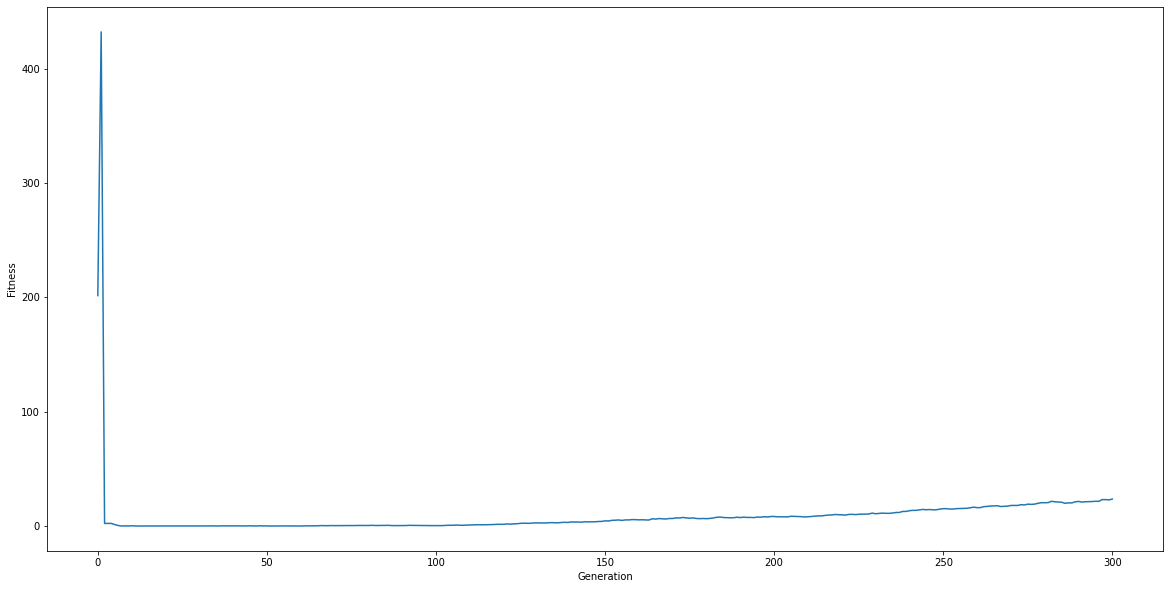

In [285]:
plot_fitness(ALL_FITNESS)

## Saving the parameters

In [286]:
with open(f'E:\Research\Statue gen output\\NewEA_4_withDelaunayVolume.txt', 'w') as f:
        f.writelines(str(PARAMS))